# Kaggle Telecoms Churn Data

Hacks
1. <font color=red> </font>
2. Search for --SAVED-- to get the previous change to the data set

**Improvements** <br>
- Apply K-folds cross validation
- Apply More PCA

# Table of Contents

## 1) Create Hypothesis

## Exploratory Data Analysis

## 2) Locate and Access Data 

## 3) Data Description

## 4) Clean Data

### - 2.1) Clean data
### - 2.2) Get a Feel For The Data 

## 3) Explore Data - Graphs and Correlations

## 5) Normalise and Scale

## 6) Balanced Positive and Negative Distribution 

## 7) Test, Train, Split

## 8) Select Model Features

## 9) K-folds Cross validation

## 10) Machine Learning Models

## 1) Create Hypothesis

**Questions to ask**
1. What causes people to churn?
2. is there a relation between how long someone has been with the carrier and if they are likely to churn?
3. <font color='red'> How do I choose a machine learning model for this data set? </font> <br>

**Goals** <br>
1. What is the maximum accuracy we can acheive for predicting whether a customer will churn and which machine learning model allows us to achieve this accuracy.  
2. What are the top 5 features that hold the most prediction power in relation to customer churn rate.
3. Hopefully impress my audience so that I can get the job!

### Import Statements

In [102]:
!pip install sklearn

In [421]:
# import statements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

deep = ["#4C72B0", "#55A868", "#C44E52", "#8172B2", "#CCB974", "#64B5CD"]

sns.set_palette(deep)
sns.set_style("whitegrid", {'axes.grid' : False})

%config InlineBackend.figure_format = 'retina'
#%config InlineBackend.figure_format = 'svg'

## 2) Locate and Access Data 

<font color='red'> --SAVED-- ==> churn <br>
- First churn data frame version </font>

In [104]:
churn = pd.read_csv('./Churn_Telecoms.csv')

In [105]:
churn.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [106]:
churn.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [107]:
# column names i.e. possible features to choose from
churn.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

## 3) Data Description

In [108]:
# Size of the dataset
churn.shape

(3333, 21)

In [109]:
# data types of each column
churn.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [110]:
# Number of numeric columns
len(churn.select_dtypes(np.number).columns.tolist())

16

In [111]:
# Number of non-numeric columns
len(churn.select_dtypes(exclude=np.number).columns.tolist())

5

In [112]:
# Number of Numeric Features Adjusted For Insight
# minus 2 since area code and customer service calls are categorical but
# of Numeric type
print("Number of Numeric Features:", churn.select_dtypes(include=[np.number]).shape[1] - 2)



Number of Numeric Features: 14


In [113]:
# Number of Categorical Features Adjusted For Insight
# plus 2 since 2 data types are numbers but are actually categorical
# and minus 1 because churn is the prediction varibale
print("Number of Categorical Features:", churn.select_dtypes(exclude=[np.number]).shape[1] + 2 - 1)



Number of Categorical Features: 6


In [114]:
# check the dtypes of each column and the counts i.e. if there are nulls
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

## 4) Clean Data

In [115]:
# check if there are any nulls in the dataset
churn.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Thankfully no nulls exist

### 4.1) Drop unnecessary columns or columns with little explanatory value

columns with little explanatory value <br>
1. **Phone number**: phone numbers are largely delt out at random thus provide little explanation for a customers decision to leave a telecoms provider

<font color='red'> --SAVED-- ==> churn_2 <br>
- Second churn data frame version </font>

In [116]:
churn_2 = churn.drop('phone number', axis = 1)

In [117]:
# number of features in the dataset
print("Number of features in the dataset:", len(churn_2.columns))

Number of features in the dataset: 20


### 4.2) Convert churn into int data type instead of bool

This allows us to more easily run machine learning models on the data set. 

In [118]:
churn_2['churn'] = churn_2["churn"].astype('int64')

In [119]:
churn_2['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [120]:
# check the proportion of churn and loyal examples
churn_2['churn'].value_counts(normalize = True)

0    0.855086
1    0.144914
Name: churn, dtype: float64

## 5) Investigate Categorical Features

Categorical Features <br>
1. International plan
2. Voice mail plan
3. Area code
4. Customer service calls
5. Churn
6. State

### 5.1) Individual Feature Investigation

In [121]:
categorical_features = churn_2.select_dtypes(exclude=[np.number])

In [122]:
categorical_features = categorical_features.assign(area_code = churn_2['area code'], customer_service_calls = churn_2['customer service calls'], churn = churn_2['churn'])
categorical_features.columns = ['state', 'international plan', 'voice mail plan', 'area code', 'customer service calls', 'churn']


In [123]:
categorical_features.head()

,state,international plan,voice mail plan,area code,customer service calls,churn
0,KS,no,yes,415,1,0
1,OH,no,yes,415,1,0
2,NJ,no,no,415,0,0
3,OH,yes,no,408,2,0
4,OK,yes,no,415,3,0


In [124]:
categorical_columns = categorical_features.columns.tolist()
print(categorical_columns)

['state', 'international plan', 'voice mail plan', 'area code', 'customer service calls', 'churn']


#### 5.1.1) International Plan

In [125]:
categorical_features['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

#### 5.1.2) Voice Mail Plan

In [126]:
categorical_features['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

#### 5.1.3) Area Code
 - Comment: Strange that there are only 3 areas codes, what are area codes?
 - Didn't make a histogram since this is a categorical variable

In [127]:
categorical_features['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

#### 5.1.4) Customer Service Calls

In [128]:
categorical_features['customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: customer service calls, dtype: int64

#### 5.1.5) Churn

In [129]:
print(categorical_features['churn'].value_counts())

no_churn = categorical_features['churn'].value_counts()[0]
churn = categorical_features['churn'].value_counts()[1]

print()
print("Percentage of data set")
print("-----------------")
print("Didn't churn:", round(no_churn/(churn+no_churn)*100, 2))
print("Did churn:", round(churn/(churn+no_churn)*100, 2))


0    2850
1     483
Name: churn, dtype: int64

Percentage of data set
-----------------
Didn't churn: 85.51
Did churn: 14.49


In [276]:
# Flag to control if images print
print_image = True


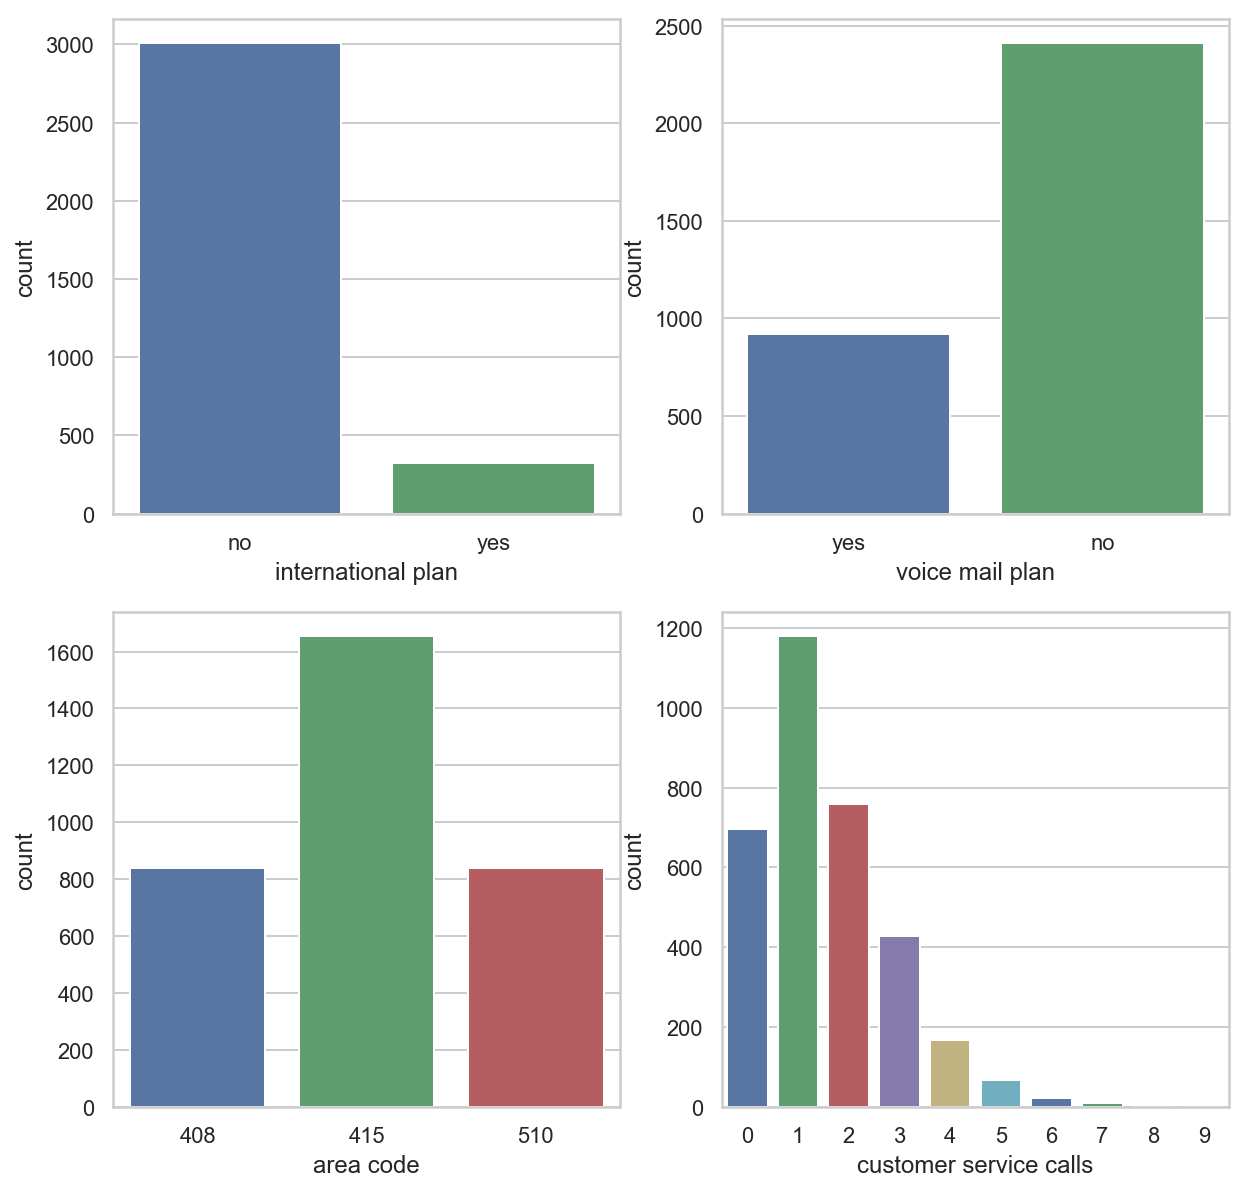

In [283]:
# plot the categorical variables except for state (too many variables)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
colour_scheme = deep
sns.countplot(x='international plan', data=categorical_features, ax=axes[0][0], palette=colour_scheme);
sns.countplot(x='voice mail plan', data=categorical_features, ax=axes[0][1], palette=colour_scheme);
sns.countplot(x='area code', data=categorical_features, ax=axes[1][0], palette=colour_scheme);
sns.countplot(x='customer service calls', data=categorical_features, ax=axes[1][1], palette=colour_scheme);

if print_image:
    plt.savefig("'1Categorical_Features'.png");


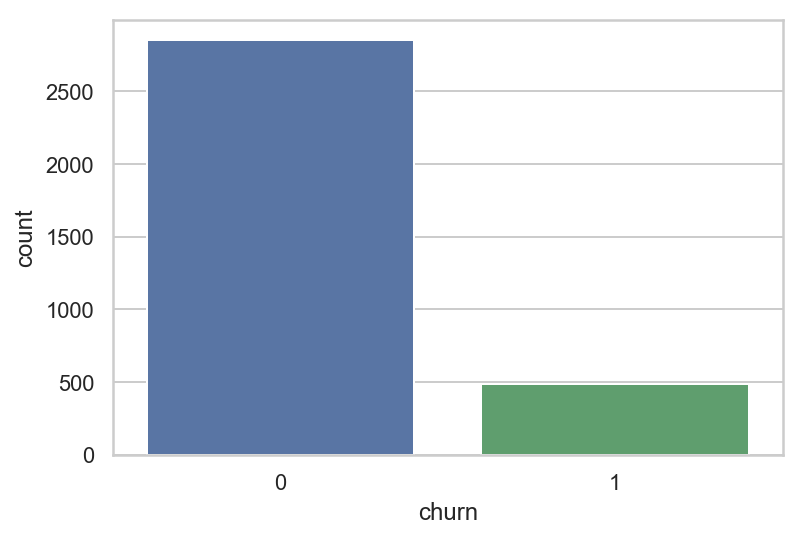

In [284]:
# Plot churn
colour_scheme = deep
sns.countplot(x='churn', data=categorical_features, palette=deep);

if print_image:
    plt.savefig("'2churn'.png");

### 5.2) Analysis of First 5 Features
- **International Plan:** most customers do not have an international plan, however, we are trying to predict the minority class so might want to look into the proportion of customer churned and do have an international plan. 
- **Voice Mail Plan:** same comments as International Plan
- **Area Code:** majority in area code 415, maybe the other area codes have less attractive networks (lower signal quality). 
- **Customer Service Calls:** majority of the issues are resolved in 0 - 2 calls. However, would like to see the proportion of churned customers in the tail end. 
- **Churn:** We can clearly see that we are predicting the minority class. Thus, we must be careful to adjust for this in our inference investigation and our machine learning modeling

#### 5.1.6) State

In [131]:
categorical_features['state'].value_counts()

WV    106
MN     84
NY     83
AL     80
OR     78
OH     78
WI     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
KS     70
MD     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
MS     65
MA     65
RI     65
AZ     64
MO     63
FL     63
ME     62
ND     62
NM     62
DE     61
NE     61
OK     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

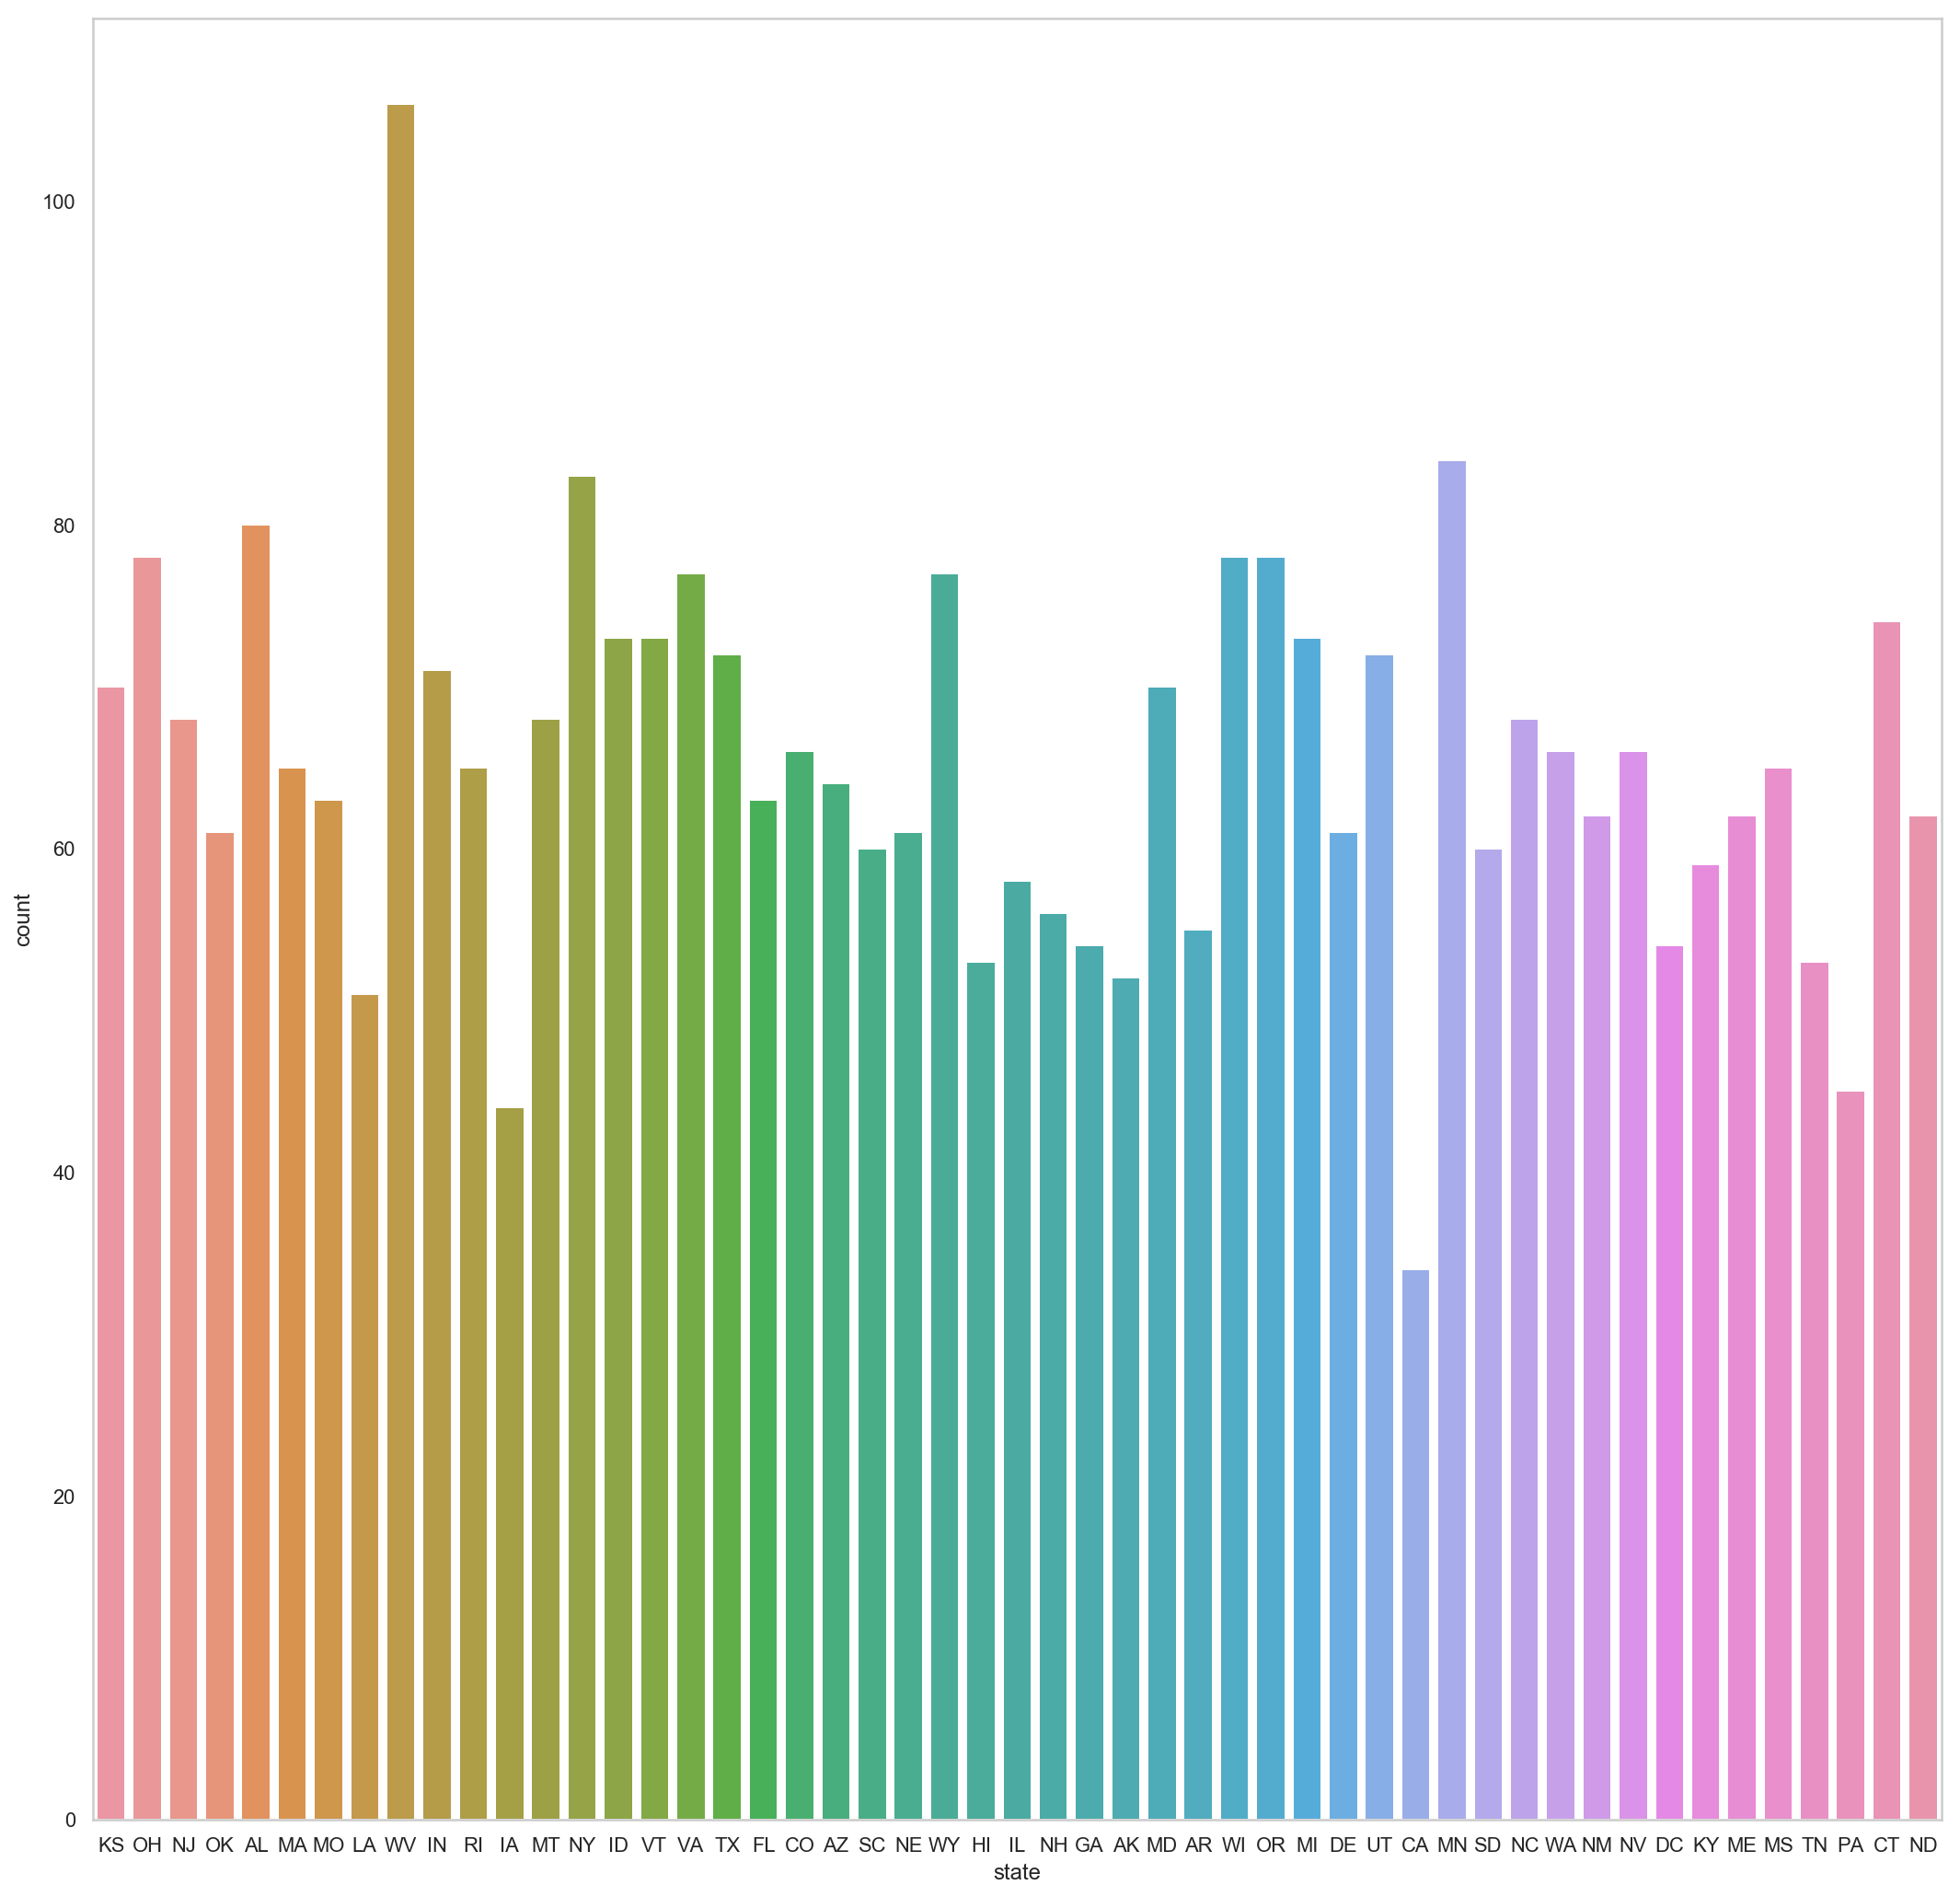

In [297]:
# State bar plot
_, axes = plt.subplots(figsize=(18, 18))
sns.countplot(x='state', data=categorical_features);

if print_image:
    plt.savefig("'3state'.png");

### 5.3) Analysis of State
- **State:** We can see that customers are pretty much evenly distributed over the different states except for anamolies such as WV (greater than average) and LA, IA, and CA (less than average). Need to investigate the churned and loyal customer rate to gain any useful information.

### 5.4) Multivariate Feature Investigation: Investigate Assumptions From Feature Analysis
- Break it up into churned and loyal customers

#### 5.4.1) Unadjusted data
- I have not adjusted for the percentage of churned and loyal customers in the data set. Just simply broken them up into their respective groups

##### 5.4.1.1) State 

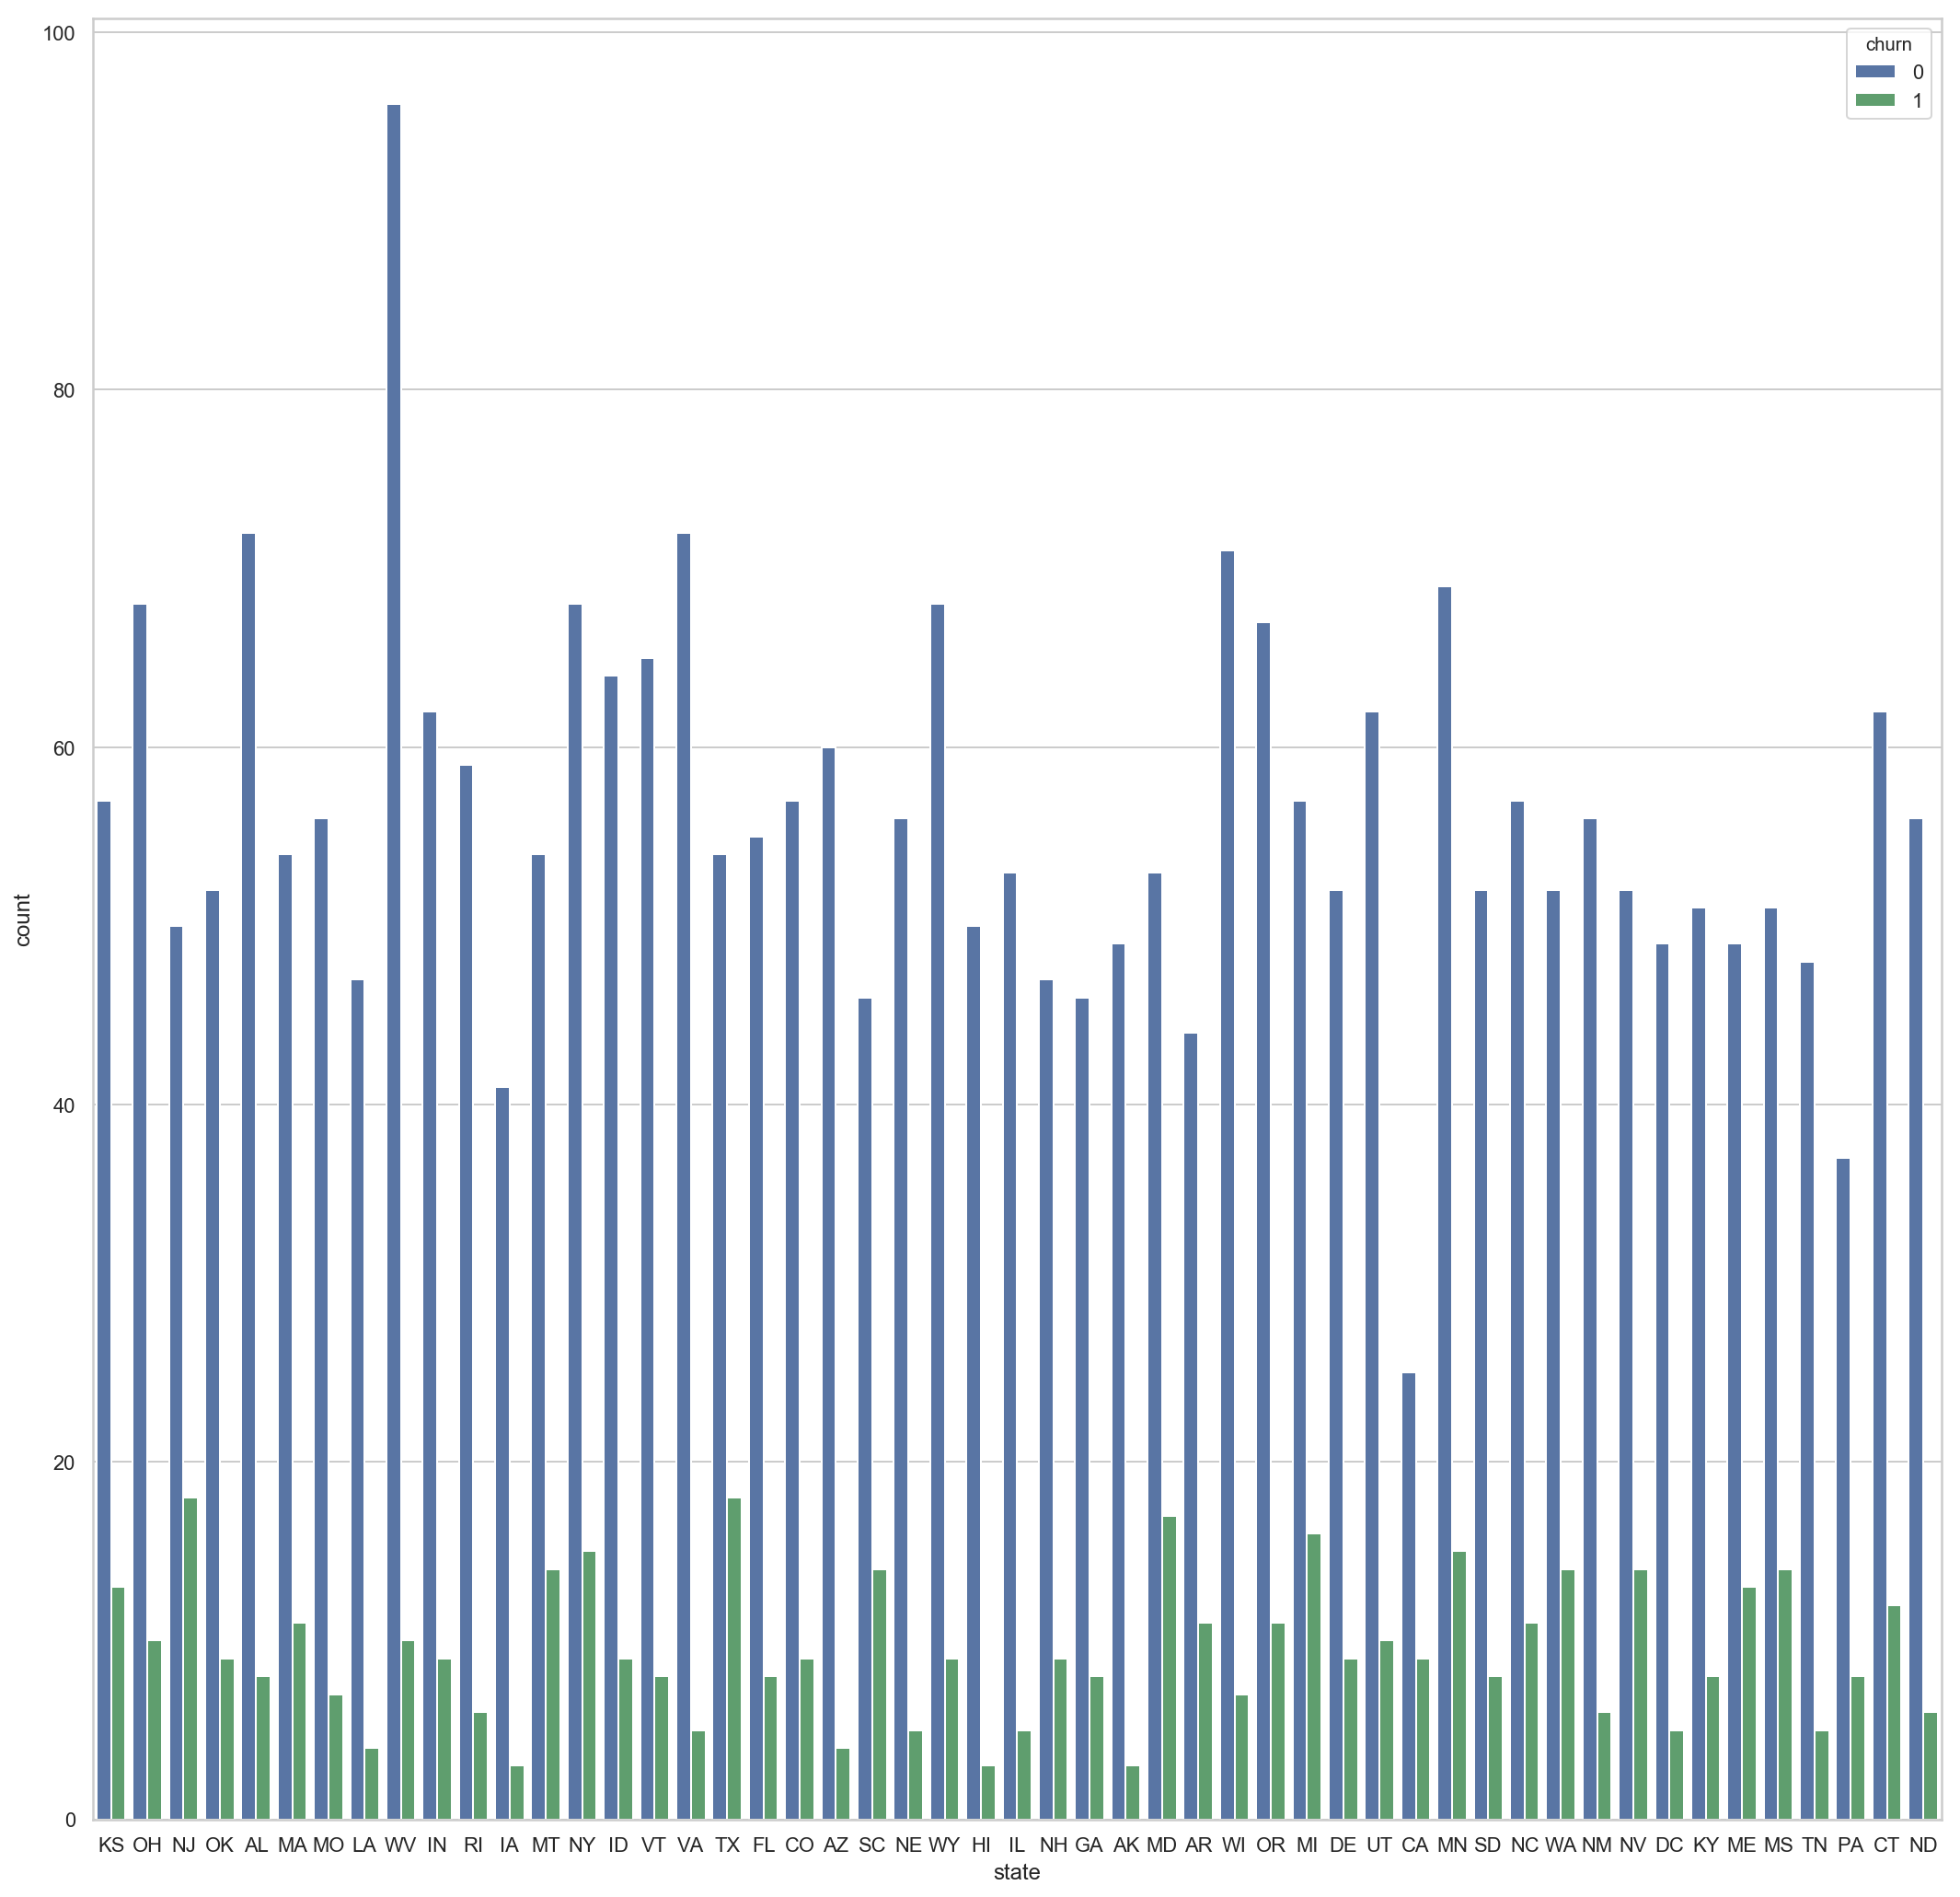

In [286]:
# State
_, axes = plt.subplots(figsize=(18, 18))
colour_scheme = deep
sns.countplot(hue = 'churn', x='state', data=categorical_features, palette=deep);

if print_image:
    plt.savefig("'4state_vs_churn'.png");

##### 5.4.1.2) International Plan, Voice Mail Plan, Area Code, Customer Service Calls

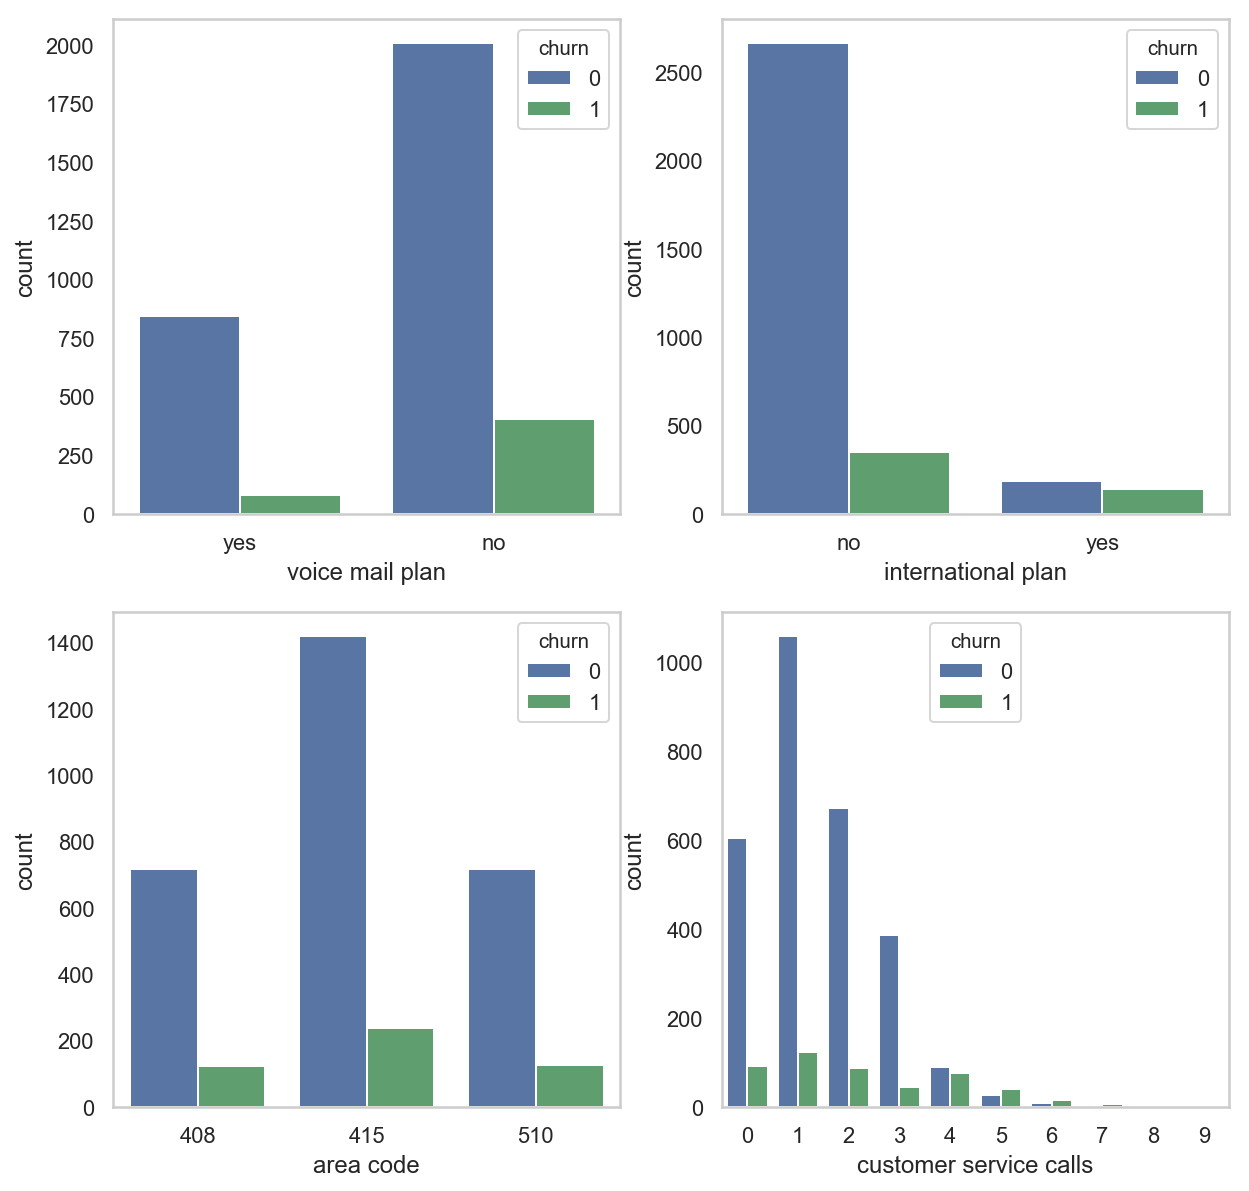

In [299]:
# Other 4 categorical variables (obviously excluding churn)
# plot the categorical variables except for state (too many variables)
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
colour_scheme = deep
sns.countplot(x='international plan', hue = 'churn', data=categorical_features, ax=axes[0][1], palette=colour_scheme);
sns.countplot(x='voice mail plan', hue = 'churn', data=categorical_features, ax=axes[0][0], palette=colour_scheme);
sns.countplot(x='area code', hue = 'churn', data=categorical_features, ax=axes[1][0], palette=colour_scheme);
sns.countplot(x='customer service calls', hue = 'churn', data=categorical_features, ax=axes[1][1], palette=colour_scheme);

if print_image:
    plt.savefig("'5CategoricalVariables_vs_churn'.png");


##### 5.4.2) Adjusted Data: Adjusted For Proportion of Data Set
- divide each bar by the total amount of examples in that class so we can compare if there is a difference in the proportion of class members in each group

In [220]:
# helper function
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [221]:
# Normalize customer service calls
state = pd.crosstab(churn_2['state'], churn_2['churn'])
state[0] = state[0].apply(lambda x: round(x/state[0].sum()*100, 2))
state[1] = state[1].apply(lambda x: round(x/state[1].sum()*100, 2))

In [222]:
# Normalize w.r.t total examples in each class

# Normalize international plan
intl_plan = pd.crosstab(churn_2['international plan'], churn_2['churn'])
intl_plan[0] = intl_plan[0].apply(lambda x: round(x/intl_plan[0].sum()*100, 2))
intl_plan[1] = intl_plan[1].apply(lambda x: round(x/intl_plan[1].sum()*100, 2))

# Normalize voice mail plan
voice_plan = pd.crosstab(churn_2['voice mail plan'], churn_2['churn'])
voice_plan[0] = voice_plan[0].apply(lambda x: round(x/voice_plan[0].sum()*100, 2))
voice_plan[1] = voice_plan[1].apply(lambda x: round(x/voice_plan[1].sum()*100, 2))

# Normalize area code
area_code = pd.crosstab(churn_2['area code'], churn_2['churn'])
area_code[0] = area_code[0].apply(lambda x: round(x/area_code[0].sum()*100, 2))
area_code[1] = area_code[1].apply(lambda x: round(x/area_code[1].sum()*100, 2))

# Normalize customer service calls
customer_service = pd.crosstab(churn_2['customer service calls'], churn_2['churn'])
customer_service[0] = customer_service[0].apply(lambda x: round(x/customer_service[0].sum()*100, 2))
customer_service[1] = customer_service[1].apply(lambda x: round(x/customer_service[1].sum()*100, 2))


# REMEMBER TO HIGHLIGHT IMPORTANT INFORMATION IN PRESENTATION SLIDES

##### 5.4.2.1) State 

In [223]:
state.sort_values([1], axis=0, ascending=False).T

state,NJ,TX,MD,MI,MN,NY,MT,NV,MS,SC,...,TN,DC,IL,VA,NE,LA,AZ,HI,IA,AK
churn,,,,,,,,,,,,,,,,,,,,,
0,1.75,1.89,1.86,2.00,2.42,2.39,1.89,1.82,1.79,1.61,...,1.68,1.72,1.86,2.53,1.96,1.65,2.11,1.75,1.44,1.72
1,3.73,3.73,3.52,3.31,3.11,3.11,2.90,2.90,2.90,2.90,...,1.04,1.04,1.04,1.04,1.04,0.83,0.83,0.62,0.62,0.62


In [224]:
# State
# First 15 states
states = ['NJ', 'TX', 'MD', 'MI', 'MN', 'NY', 'MT', 'NV', 'MS', 'SC','WA', 'KS', 'ME', 'CT', 'OR']

state_2 = state.T[states]
state_2 = state_2.T

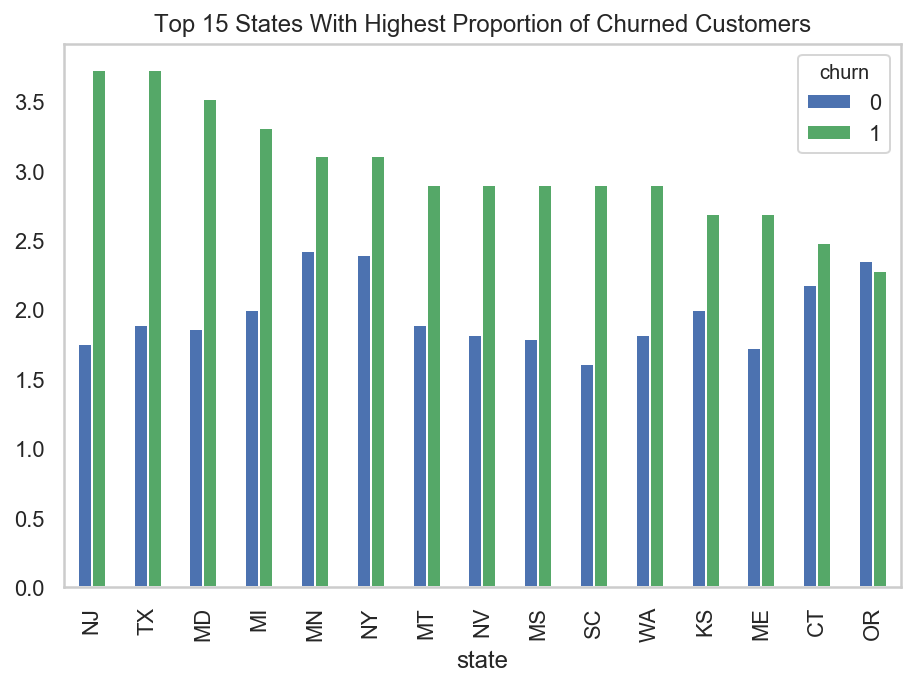

In [292]:
# State top 15
_, axes = plt.subplots(figsize=(7.5, 5))
colour_scheme = deep
state_2.plot(kind='bar', ax=axes);
plt.title("Top 15 States With Highest Proportion of Churned Customers");

if print_image:
    plt.savefig("'6State_vs_churn_Adjusted'.png");
    
    
    

##### 5.4.2.2) International Plan, Voice Mail Plan, Area Code, Customer Service Calls

In [242]:
# Show the features that do not have much difference between classes
display_side_by_side(voice_plan, intl_plan)
display_side_by_side(area_code, customer_service)

churn,0,1
voice mail plan,,
no,70.46,83.44
yes,29.54,16.56
churn,0,1
international plan,,
no,93.47,71.64
yes,6.53,28.36


churn,0,1
area code,,
408,25.12,25.26
415,49.79,48.86
510,25.09,25.88
churn,0,1
customer service calls,,
0,21.23,19.05
1,37.16,25.26
2,23.58,18.01
3,13.51,9.11


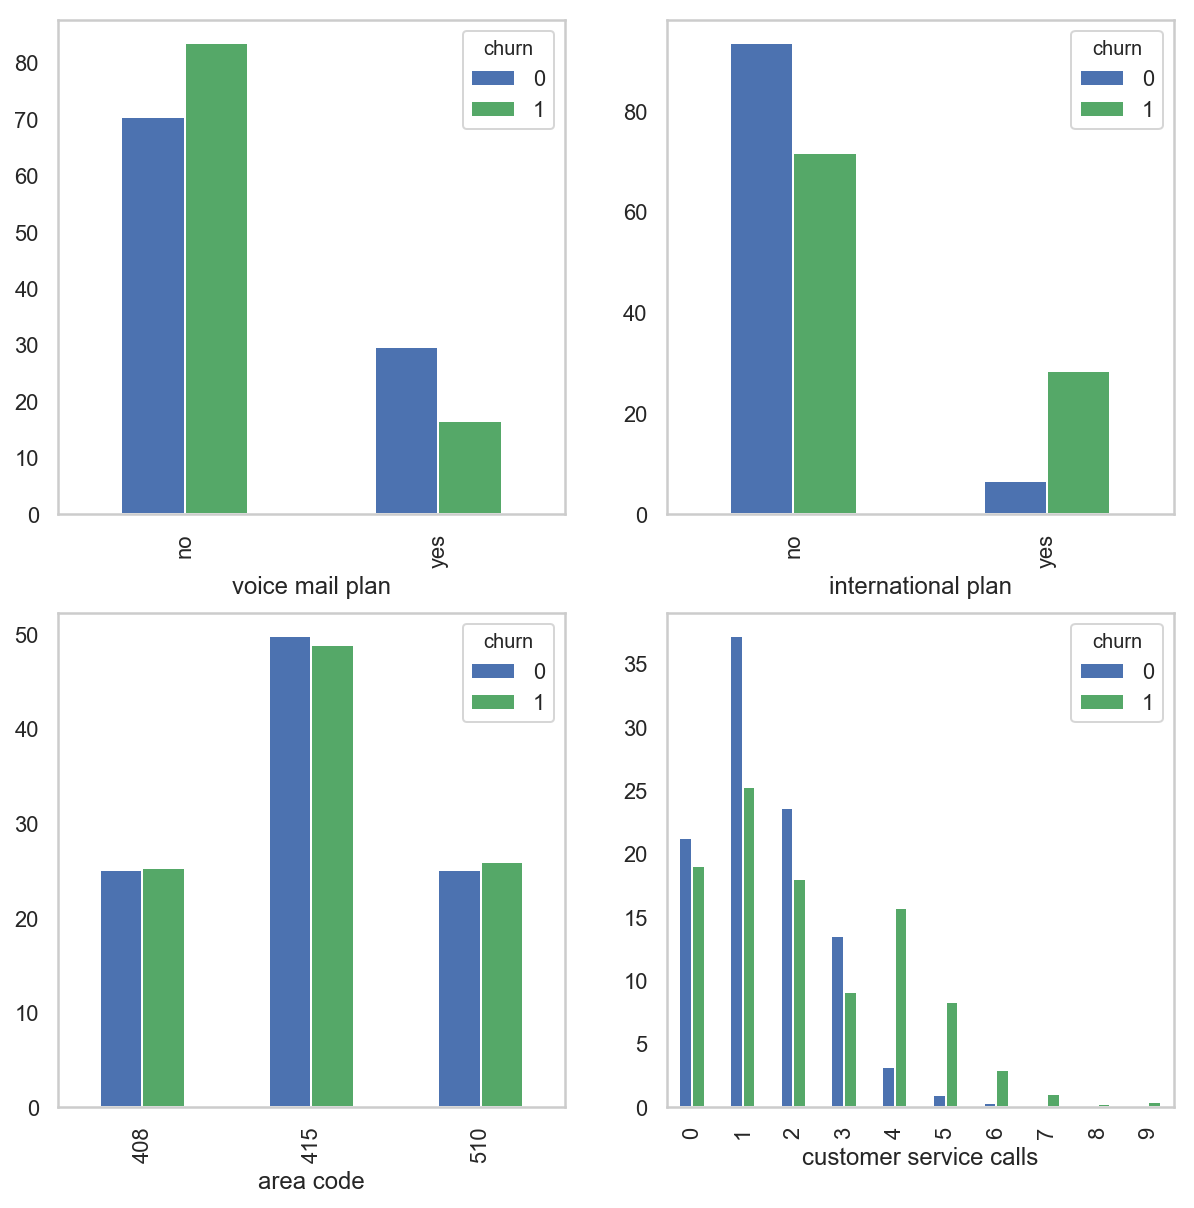

In [298]:
# investigate assumptions from analysis
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

intl_plan.plot(kind='bar', ax=axes[0][1]);
voice_plan.plot(kind='bar', ax=axes[0][0]);
area_code.plot(kind='bar', ax=axes[1][0]);
customer_service.plot(kind='bar', ax=axes[1][1]);


if print_image:
    plt.savefig("'7CategoricalVariable_vs_churn_Adjusted'.png");


### 5.5) Analysis of Adjusted Data: 
- **State: (predictor=YES)** We can see that if we take the top 15 states with the highest level of churn there is a significant difference in loyal and churned customer proportions. Thus, this could be a good predictor of churn rate as there might be lower quality service in these states. However, It could also be a confounding variable. 
- **Voice mail plan: (predictor=NO)** We can see that less customers who churned had voice mail plans than loyal customers. Therefore, this might not be a good predictor of churn
- **International Plan: (predictor=YES)** in contrast the proportion of customers who churned and had an international plan was over 4 times the amount of the proportion of loyal customers with an international plan. Thus, this is probably a good predictor of churn rate. 
- **Area code: (predictor=NO)** The proportion of customers from both classes was relatively consistient over all area codes. Not a good predictor of churn rate. 
- **Customer Service Calls: (predictor=YES)** There is a dramatic difference in the proportion of people who churned with greater than 3 customer service calls and the proportion of people who were loyal with greater than 3 customer service calls. This is probably a very good predictor of churn rate

## 6) Investigate Numeric Features
- <font color= "red"> See Appendix for investigation of individaul numeric features </font>
- Histograms of the numerical features are a good way to see if they are Guassian or some other type of distribution. This is important for modelling because most machine learning models assume gaussian distributions. 

In [310]:
# summary statistics for all numeric columns
# rounded to 2 decimal places
churn_2.describe().apply(lambda x: round(x))

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0
mean,101.0,437.0,8.0,180.0,100.0,31.0,201.0,100.0,17.0,201.0,100.0,9.0,10.0,4.0,3.0,2.0,0.0
std,40.0,42.0,14.0,54.0,20.0,9.0,51.0,20.0,4.0,51.0,20.0,2.0,3.0,2.0,1.0,1.0,0.0
min,1.0,408.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,33.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,74.0,408.0,0.0,144.0,87.0,24.0,167.0,87.0,14.0,167.0,87.0,8.0,8.0,3.0,2.0,1.0,0.0
50%,101.0,415.0,0.0,179.0,101.0,30.0,201.0,100.0,17.0,201.0,100.0,9.0,10.0,4.0,3.0,1.0,0.0
75%,127.0,510.0,20.0,216.0,114.0,37.0,235.0,114.0,20.0,235.0,113.0,11.0,12.0,6.0,3.0,2.0,0.0
max,243.0,510.0,51.0,351.0,165.0,60.0,364.0,170.0,31.0,395.0,175.0,18.0,20.0,20.0,5.0,9.0,1.0


**Insepct the churned and loyal user classes**

In [311]:
# average numerical values for churned users 
churn_2[churn_2['churn']==1].mean().apply(lambda x: round(x))

account length            103
area code                 438
number vmail messages       5
total day minutes         207
total day calls           101
total day charge           35
total eve minutes         212
total eve calls           101
total eve charge           18
total night minutes       205
total night calls         100
total night charge          9
total intl minutes         11
total intl calls            4
total intl charge           3
customer service calls      2
churn                       1
dtype: int64

In [312]:
# average numerical values for loyal users
churn_2[churn_2['churn']==0].mean().apply(lambda x: round(x))

account length            101
area code                 437
number vmail messages       9
total day minutes         175
total day calls           100
total day charge           30
total eve minutes         199
total eve calls           100
total eve charge           17
total night minutes       200
total night calls         100
total night charge          9
total intl minutes         10
total intl calls            5
total intl charge           3
customer service calls      1
churn                       0
dtype: int64

The Table below shows that there are significant differences between the two groups in 
1. number vmail messages
2. total day minutes
3. total day charge
3. total eve minutes

<img src="./churned_vs_loyal_table1.png" width="200" height="40">

### 6.2) Box Plots and Histograms

#### 1) TOP 3 CORRELATED FEATURES WITH CHURN
1. Total day minutes
2. Total day charge 
3. Customer Service calls 

**1) total day minutes vs churn**

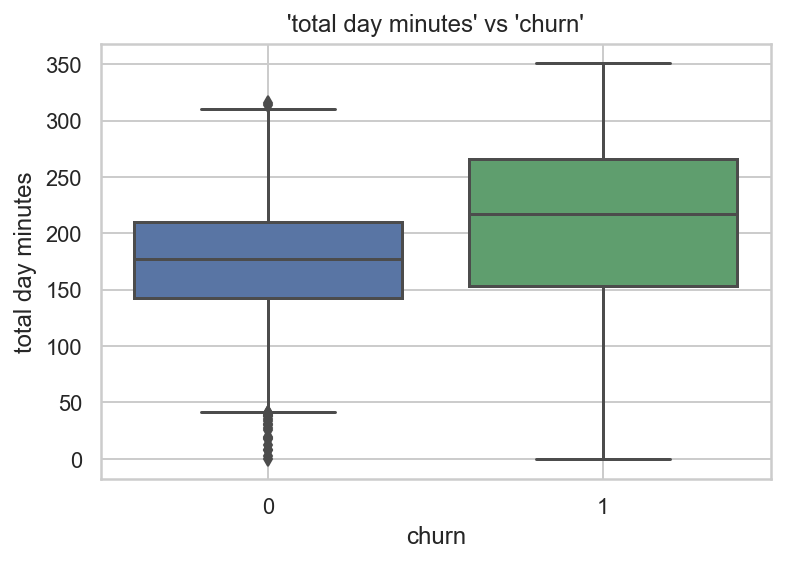

In [423]:
# Draw a boxplot 
fig, ax = plt.subplots()
sns.boxplot(y=churn_2["total day minutes"], x=churn_2['churn'])
plt.title("'total day minutes' vs 'churn'")
ax.grid(True)
plt.show()

if print_image:
    fig.savefig("'9total day minutes vs churn'.png");

Median: less for people who didn't churn <br>
Spread: greater spread for people who did churn, on average greater day minutes

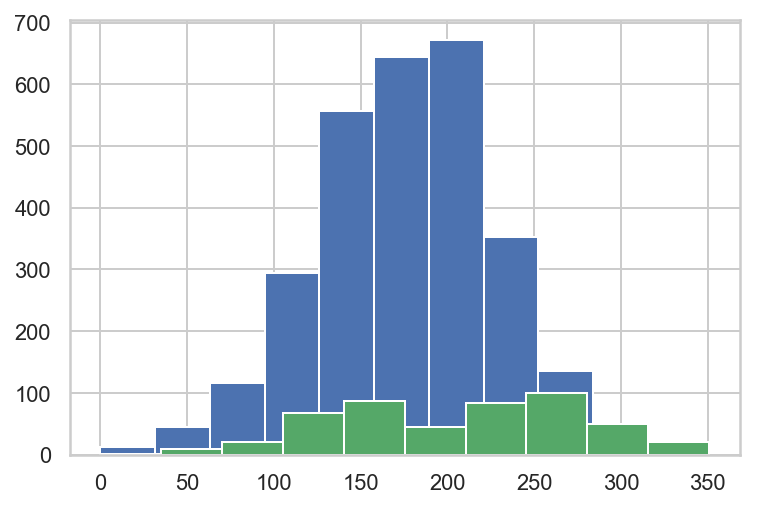

In [314]:
churn_2[(churn_2["churn"]==False)]["total day minutes"].hist();
churn_2[(churn_2["churn"]==True)]["total day minutes"].hist();


**Histogram Analysis** <br>
Distribution for the clients who did churn is far greater than the clients who didn't

**Single Class Histograms**

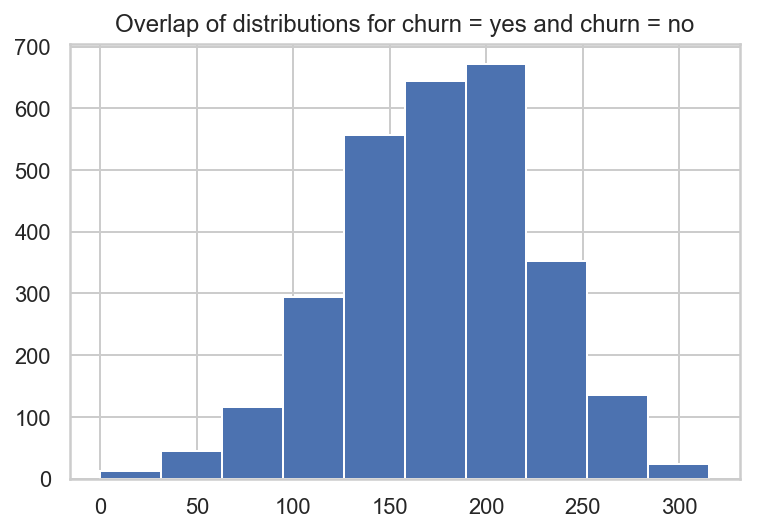

In [315]:
fig, ax = plt.subplots()
churn_2[(churn_2["churn"]==False)]["total day minutes"].hist();
plt.title("Overlap of distributions for churn = yes and churn = no")
plt.show()

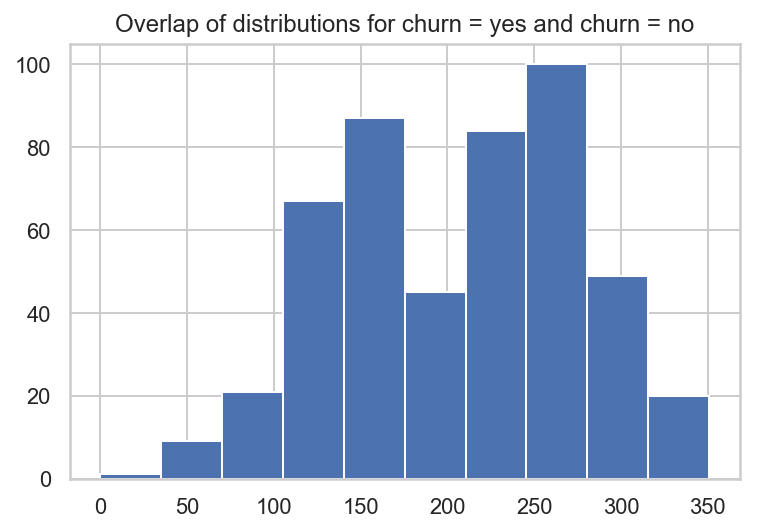

In [316]:
fig, ax = plt.subplots()
churn_2[(churn_2["churn"]==True)]["total day minutes"].hist();
plt.title("Overlap of distributions for churn = yes and churn = no")
plt.show()

**2) total day charge vs churn**

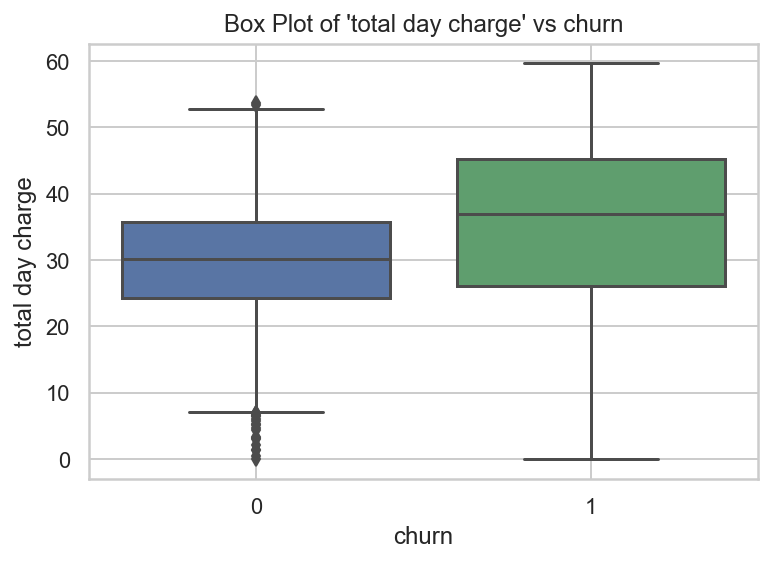

In [428]:
# Draw a boxplot 
fig, ax = plt.subplots()
sns.boxplot(y=churn_2["total day charge"], x=churn_2['churn'])
plt.title("Box Plot of 'total day charge' vs churn")
ax.grid(True)
plt.show()

if print_image:
    fig.savefig("'12total day charge'.png");

Median: less for people who didn't churn <br>
Spread: greater spread for people who did churn, on average greater day charge 

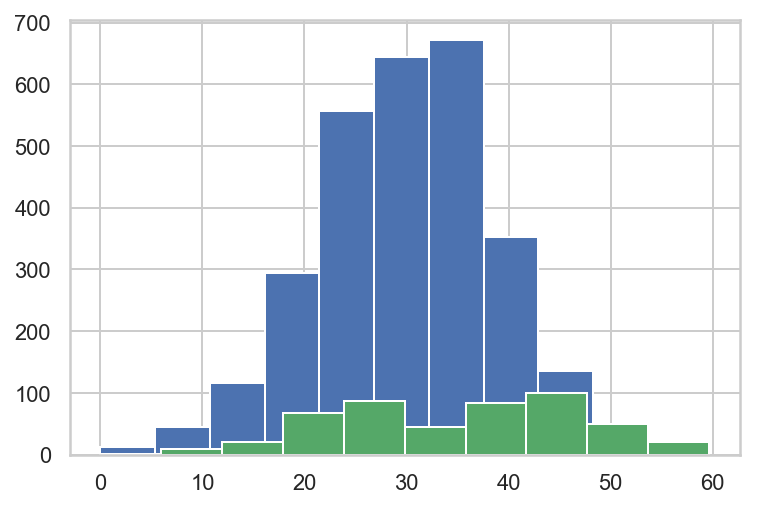

In [318]:
churn_2[(churn_2["churn"]==False)]["total day charge"].hist();
churn_2[(churn_2["churn"]==True)]["total day charge"].hist();

**Histogram Analysis** <br>
Distribution for the clients who did churn is far greater than the clients who didn't

**Single Class Histograms**

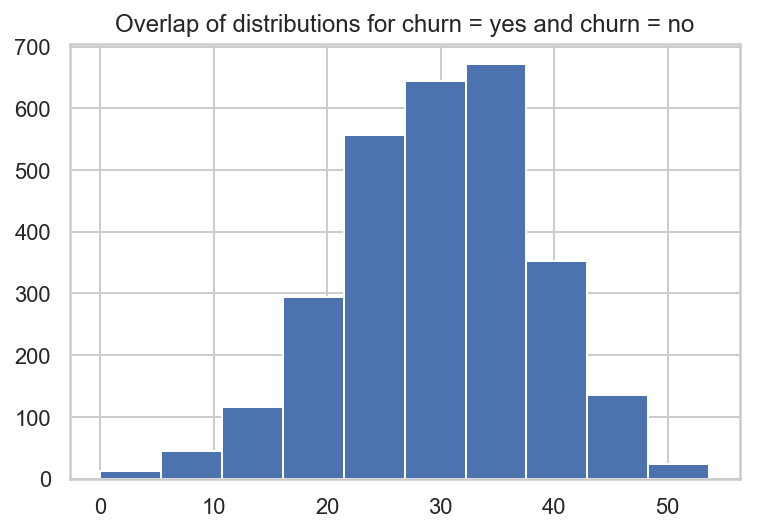

In [319]:
fig, ax = plt.subplots()
churn_2[(churn_2["churn"]==False)]["total day charge"].hist();
plt.title("Overlap of distributions for churn = yes and churn = no")
plt.show()

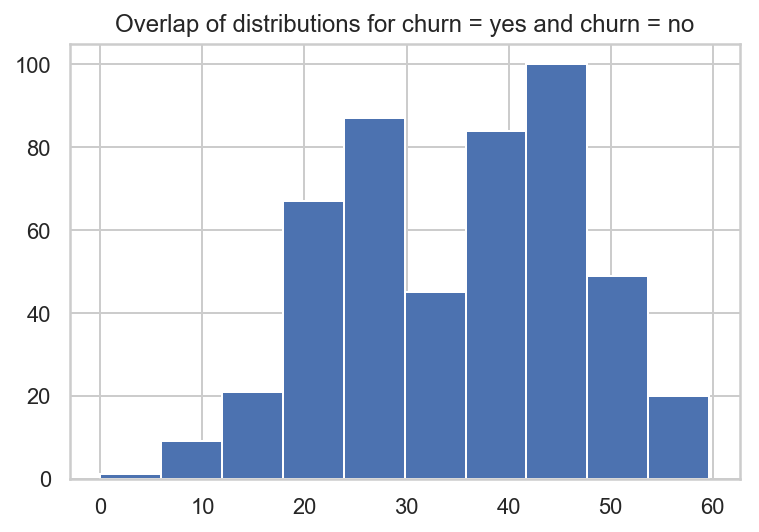

In [320]:
fig, ax = plt.subplots()
churn_2[(churn_2["churn"]==True)]["total day charge"].hist();
plt.title("Overlap of distributions for churn = yes and churn = no")
plt.show()

**3) customer service calls vs churn**

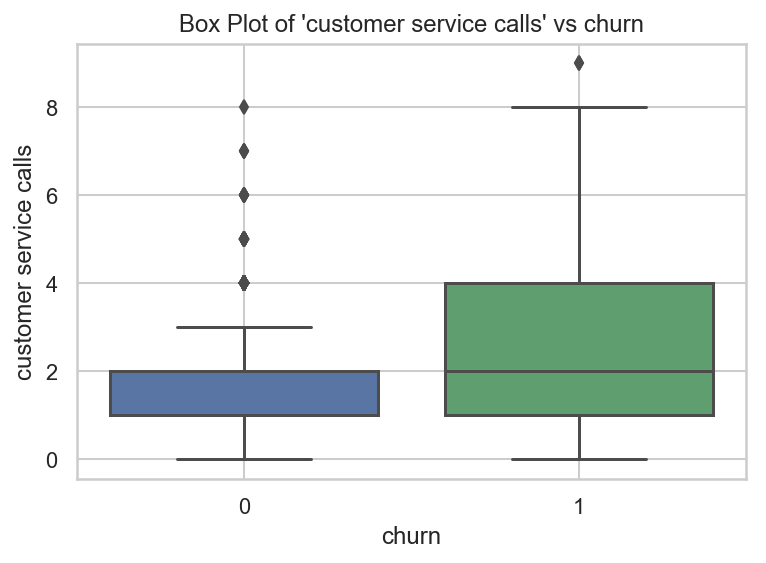

In [426]:
# Draw a boxplot 
fig, ax = plt.subplots()
sns.boxplot(y=churn_2["customer service calls"], x=churn_2['churn'])
plt.title("Box Plot of 'customer service calls' vs churn")
ax.grid(True)
plt.show()

if print_image:
    fig.savefig("'10Customer service calls'.png");

**Further Median Analysis** 

In [322]:
didnt_churn = churn_2[(churn_2["churn"]==False)]["customer service calls"].median();
did_churn = churn_2[(churn_2["churn"]==True)]["customer service calls"].median();

print("Median of those that 'didn't churn':", didnt_churn)
print("Median of those that 'did churn':", did_churn)


Median of those that 'didn't churn': 1.0
Median of those that 'did churn': 2.0


Median: less for people who didn't churn 1.0 vs 2.0 <br>
Spread: greater spread for people who did churn, from 1.0 to 4.0

**Histogram Analysis** <br>

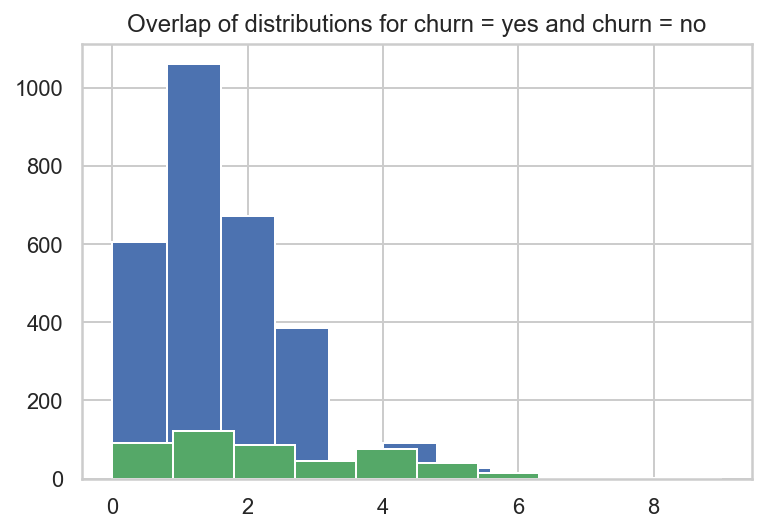

In [323]:
# overlay of both churn and didn't churn distributions
fig, ax = plt.subplots()
churn_2[(churn_2["churn"]==False)]["customer service calls"].hist();
churn_2[(churn_2["churn"]==True)]["customer service calls"].hist();
plt.title("Overlap of distributions for churn = yes and churn = no")
plt.show()

Distribution for the clients who did churn is far greater than the clients who didn't

**Single Class Histograms**

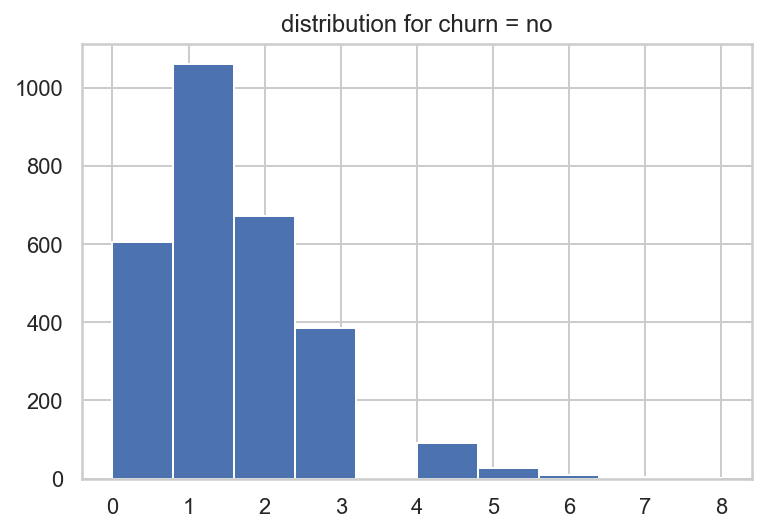

In [324]:
fig, ax = plt.subplots()
churn_2[(churn_2["churn"]==False)]["customer service calls"].hist();
plt.title("distribution for churn = no")
plt.show()

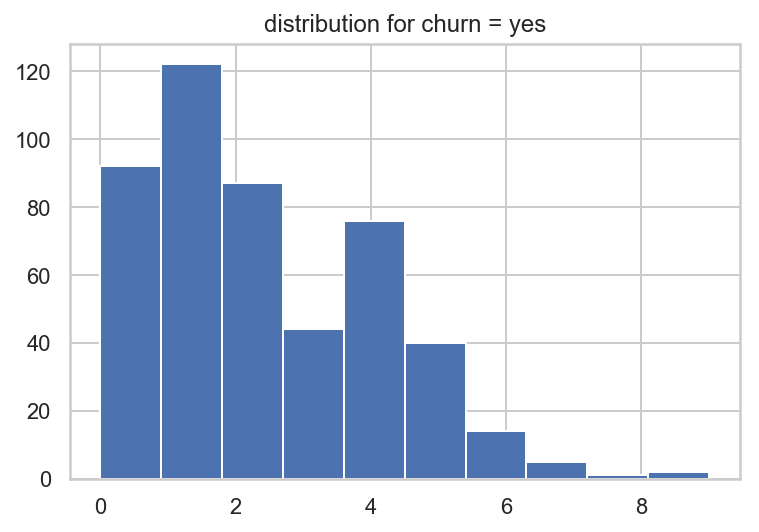

In [325]:
fig, ax = plt.subplots()
churn_2[(churn_2["churn"]==True)]["customer service calls"].hist();
plt.title("distribution for churn = yes")
plt.show()

**4) total eve minutes**

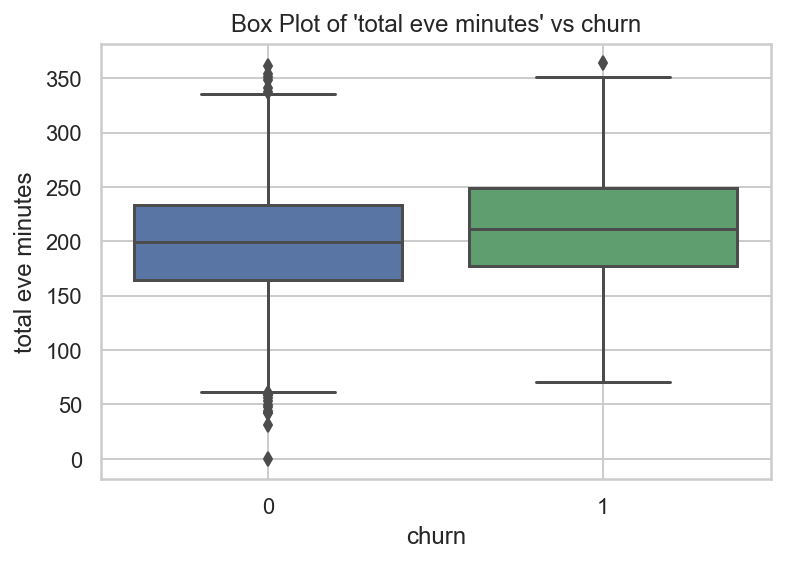

In [424]:
# Draw a boxplot 
fig, ax = plt.subplots()
sns.boxplot(y=churn_2["total eve minutes"], x=churn_2['churn'])
plt.title("Box Plot of 'total eve minutes' vs churn")
ax.grid(True)
plt.show()

**4) total eve minutes**

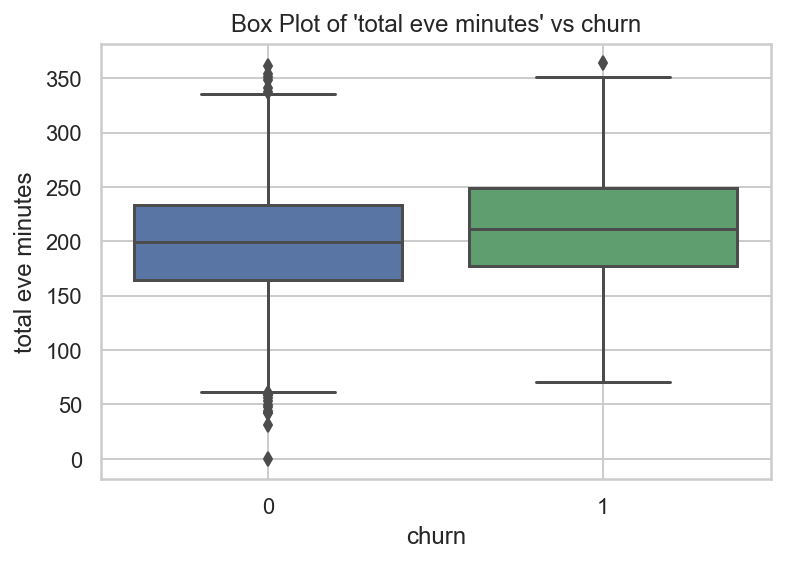

In [424]:
# Draw a boxplot 
fig, ax = plt.subplots()
sns.boxplot(y=churn_2["total eve minutes"], x=churn_2['churn'])
plt.title("Box Plot of 'total eve minutes' vs churn")
ax.grid(True)
plt.show()

**5) number vmail messages**

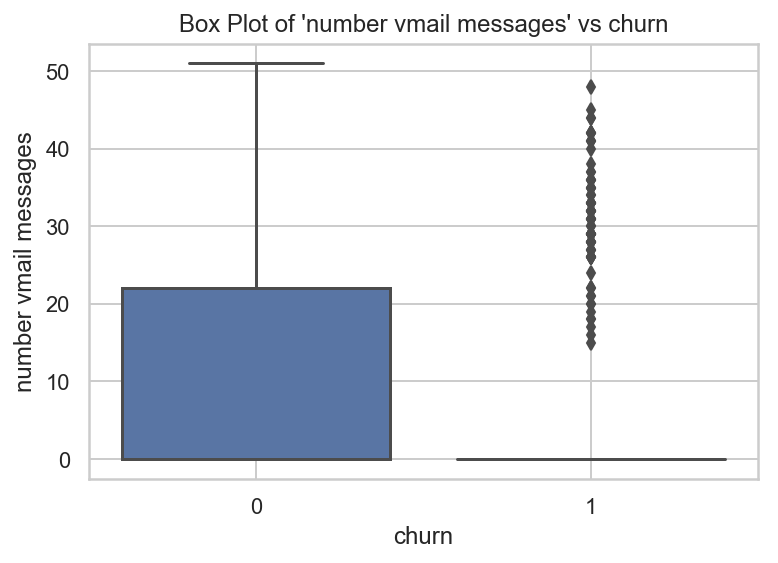

In [427]:
# Draw a boxplot 
fig, ax = plt.subplots()
sns.boxplot(y=churn_2["number vmail messages"], x=churn_2['churn'])
plt.title("Box Plot of 'number vmail messages' vs churn")
ax.grid(True)
plt.show()

if print_image:
    fig.savefig("'11number vmail messages'.png");

#### 6) account length

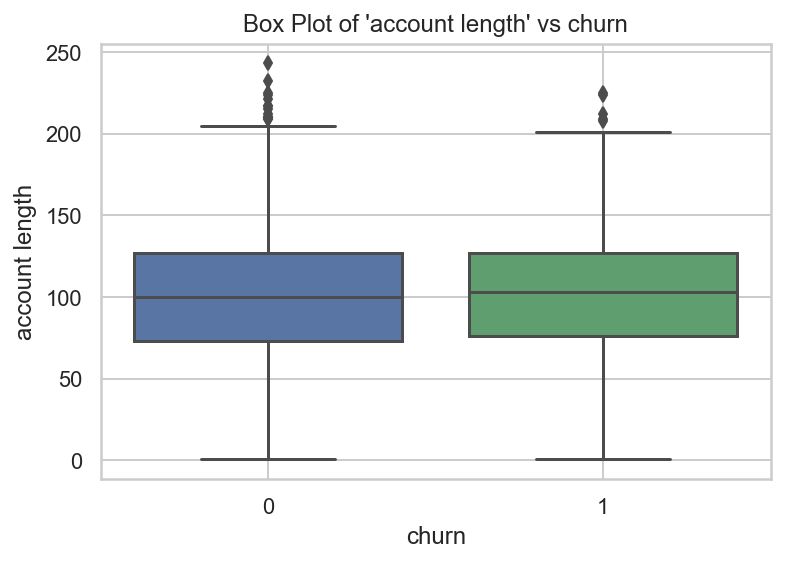

In [429]:
# Draw a boxplot 
fig, ax = plt.subplots()
sns.boxplot(y=churn_2["account length"], x=churn_2['churn'])
plt.title("Box Plot of 'account length' vs churn")
ax.grid(True)
plt.show()

if print_image:
    fig.savefig("'13account length'.png");

## 7) Aggregate Totals Columns - Churn_3

**Add aggregate columns to churn_3 data frame and drop individaul columns** <br>
**Add** 
1. total minutes
2. total calls
3. total charge <br>
**Drop** 
1. total day minutes         
2. total day calls           
3. total day charge           
4. total eve minutes         
5. total eve calls           
6. total eve charge           
7. total night minutes       
8. total night calls         
9. total night charge          
10. total intl minutes         
11. total intl calls            
12. total intl charge

<font color='red'> --SAVED-- ==> churn_3 <br>
- Third churn data frame version </font>

In [326]:
churn_3 = churn_2.copy()

In [327]:
# total minutes
churn_3['total minutes'] = churn_3['total day minutes'] + churn_3['total eve minutes'] + churn_3['total night minutes'] + churn_3['total intl minutes']
churn_3.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total minutes
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,717.2
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,625.2
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,539.4
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,564.8
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,512.0


In [328]:
# total calls
churn_3['total calls'] = churn_3['total day calls'] + churn_3['total eve calls'] + churn_3['total night calls'] + churn_3['total intl calls']
churn_3.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total minutes,total calls
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,0,717.2,303
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,625.2,332
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,539.4,333
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,0,564.8,255
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,0,512.0,359


In [329]:
# total charge
churn_3['total charge'] = churn_3['total day charge'] + churn_3['total eve charge'] + churn_3['total night charge'] + churn_3['total intl charge']
churn_3.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total minutes,total calls,total charge
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,91,11.01,10.0,3,2.70,1,0,717.2,303,75.56
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,103,11.45,13.7,3,3.70,1,0,625.2,332,59.24
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,104,7.32,12.2,5,3.29,0,0,539.4,333,62.29
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,89,8.86,6.6,7,1.78,2,0,564.8,255,66.80
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,121,8.41,10.1,3,2.73,3,0,512.0,359,52.09


In [330]:
# make churn the last column again
churn_3.drop(['churn'], axis=1, inplace=True)
churn_3['churn'] = churn_2['churn']
churn_3.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,total minutes,total calls,total charge,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,91,11.01,10.0,3,2.70,1,717.2,303,75.56,0
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,103,11.45,13.7,3,3.70,1,625.2,332,59.24,0
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,104,7.32,12.2,5,3.29,0,539.4,333,62.29,0
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,89,8.86,6.6,7,1.78,2,564.8,255,66.80,0
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,121,8.41,10.1,3,2.73,3,512.0,359,52.09,0


In [331]:
# drop individaul columns
drop_columns = ['total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge']
churn_3.drop(drop_columns, inplace=True, axis=1)
 

### 7.1) Summary Statistics For Aggregate Columns

#### 7.1.1) Mean

In [332]:
# average numerical values for churned users 
churn_3[churn_3['churn']==1].mean().apply(lambda x: round(x))

account length            103
area code                 438
number vmail messages       5
customer service calls      2
total minutes             635
total calls               306
total charge               65
churn                       1
dtype: int64

In [333]:
# average numerical values for loyal users
churn_3[churn_3['churn']==0].mean().apply(lambda x: round(x))

account length            101
area code                 437
number vmail messages       9
customer service calls      1
total minutes             585
total calls               305
total charge               58
churn                       0
dtype: int64

#### 7.1.2) Median

In [334]:
# Median numerical values for churned users 
churn_3[churn_3['churn']==1].median().apply(lambda x: round(x))

account length            103
area code                 415
number vmail messages       0
customer service calls      2
total minutes             646
total calls               306
total charge               67
churn                       1
dtype: int64

In [335]:
# Median numerical values for loyal users
churn_3[churn_3['churn']==0].median().apply(lambda x: round(x))

account length            100
area code                 415
number vmail messages       0
customer service calls      1
total minutes             589
total calls               305
total charge               59
churn                       0
dtype: int64

We can observe that the median and mean total minutes and charges are relatively similar <br>
**Churned**: 65 (mean) vs 67 (median) <br>
**Loyal**: 58 (mean) vs 59 (median) <br>
So we can assumed that they are normally distributed. 


#### 7.1.3) Description Statistics

In [336]:
# Median numerical values for churned users 
churn_3[churn_3['churn']==1].describe().apply(lambda x: round(x))

,account length,area code,number vmail messages,customer service calls,total minutes,total calls,total charge,churn
count,483.0,483.0,483.0,483.0,483.0,483.0,483.0,483.0
mean,103.0,438.0,5.0,2.0,635.0,306.0,65.0,1.0
std,39.0,43.0,12.0,2.0,111.0,35.0,14.0,0.0
min,1.0,408.0,0.0,0.0,320.0,207.0,23.0,1.0
25%,76.0,408.0,0.0,1.0,547.0,283.0,53.0,1.0
50%,103.0,415.0,0.0,2.0,646.0,306.0,67.0,1.0
75%,127.0,510.0,0.0,4.0,725.0,331.0,77.0,1.0
max,225.0,510.0,48.0,9.0,885.0,408.0,96.0,1.0


In [337]:
# Median numerical values for loyal users
churn_3[churn_3['churn']==0].describe().apply(lambda x: round(x))

,account length,area code,number vmail messages,customer service calls,total minutes,total calls,total charge,churn
count,2850.0,2850.0,2850.0,2850.0,2850.0,2850.0,2850.0,2850.0
mean,101.0,437.0,9.0,1.0,585.0,305.0,58.0,0.0
std,40.0,42.0,14.0,1.0,84.0,34.0,9.0,0.0
min,1.0,408.0,0.0,0.0,284.0,191.0,23.0,0.0
25%,73.0,408.0,0.0,1.0,529.0,282.0,52.0,0.0
50%,100.0,415.0,0.0,1.0,589.0,305.0,59.0,0.0
75%,127.0,510.0,22.0,2.0,642.0,328.0,65.0,0.0
max,243.0,510.0,51.0,8.0,842.0,416.0,87.0,0.0


#### 7.1.4) Aggregate Box Plots

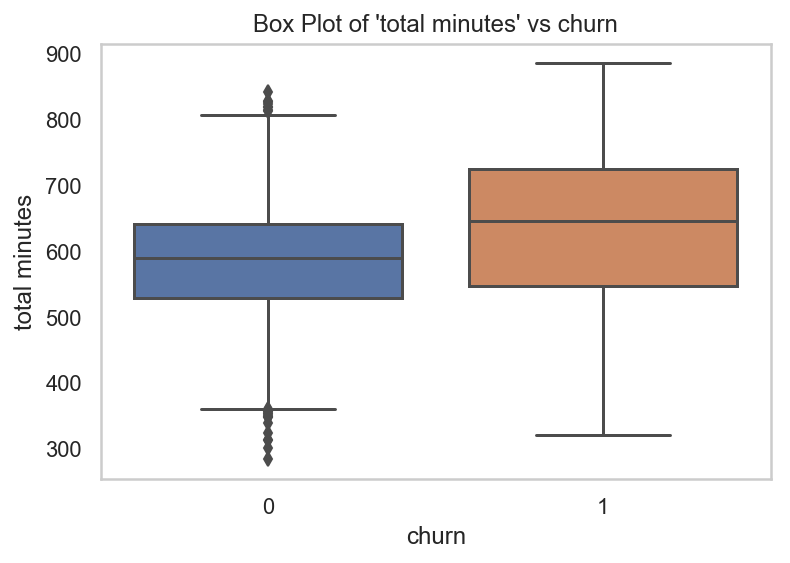

In [338]:
# total minutes vs churn 
fig, axes = plt.subplots()
sns.set(style="whitegrid")
sns.boxplot(y=churn_3["total minutes"], x=churn_3['churn'])
plt.title("Box Plot of 'total minutes' vs churn")
plt.show()

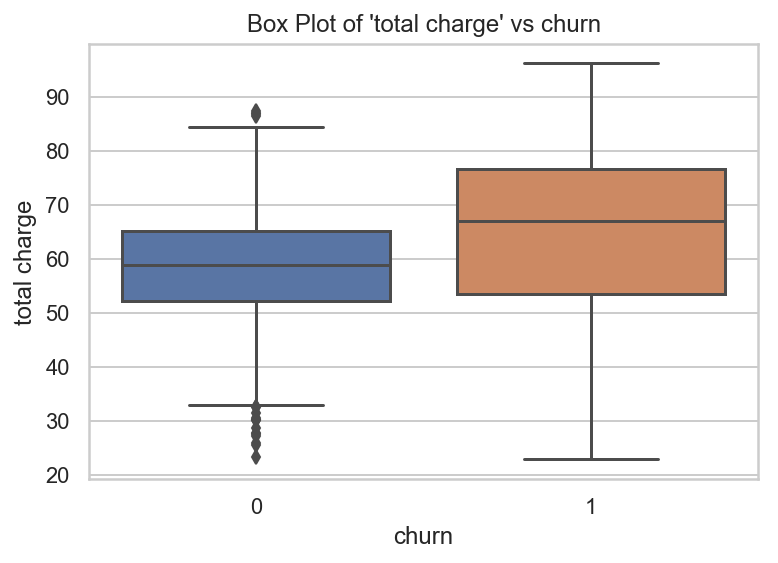

In [339]:
# total charge vs churn 
fig, ax = plt.subplots()
sns.set(style="whitegrid")
sns.boxplot(y=churn_3["total charge"], x=churn_3['churn'])
plt.title("Box Plot of 'total charge' vs churn")
plt.show()

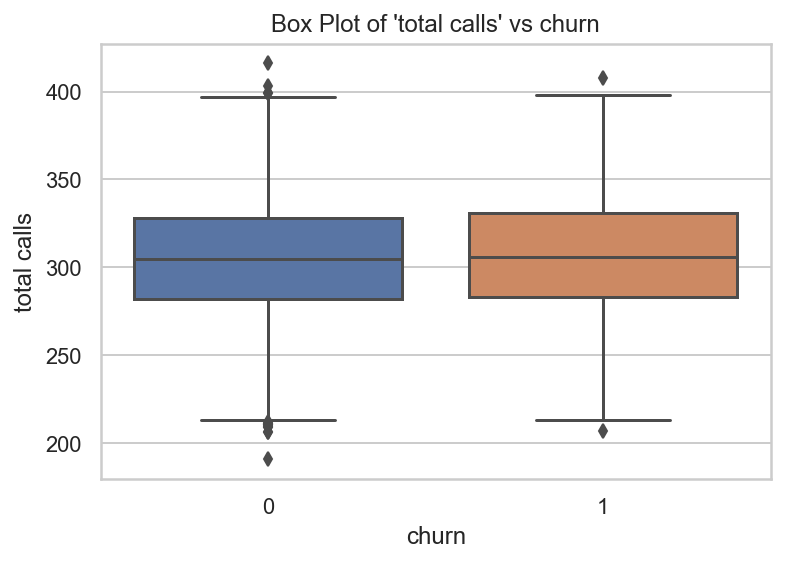

In [340]:
# total calls vs churn 
fig, ax = plt.subplots()
sns.set(style="whitegrid")
sns.boxplot(y=churn_3["total calls"], x=churn_3['churn'])
plt.title("Box Plot of 'total calls' vs churn")
plt.show()

### 2.3) Visualize The Data  Set

### 2.3.1) 1. Heat Map With Total Columns -  _churn_3

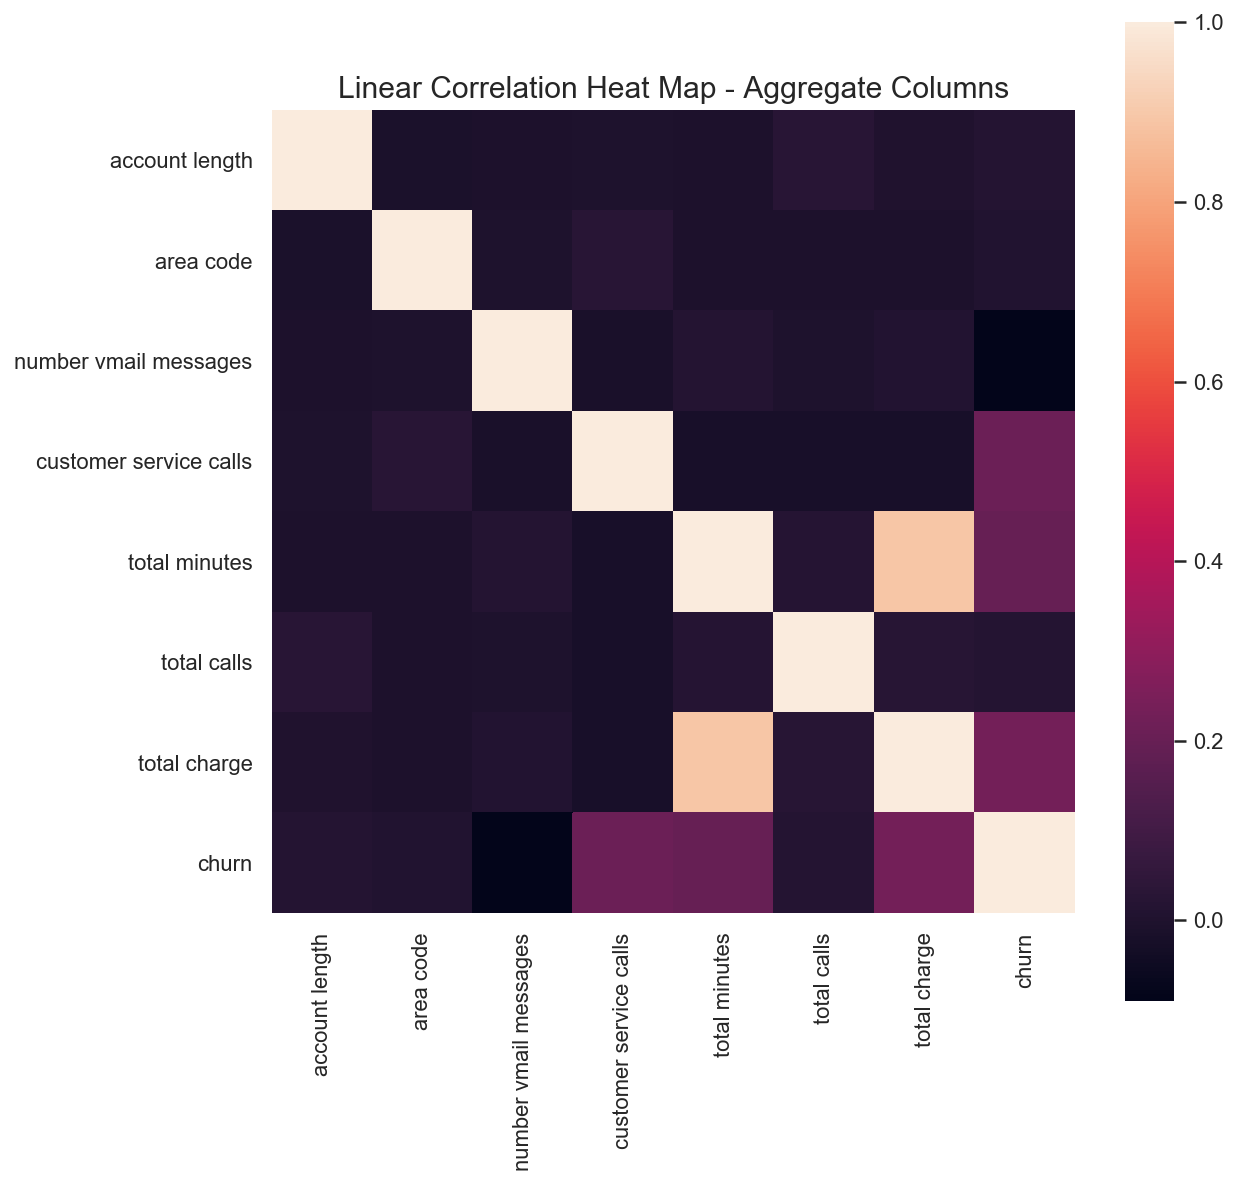

In [341]:
fig, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(churn_3.corr(), square = True)
plt.title("Linear Correlation Heat Map - Aggregate Columns", fontsize = 15)
plt.show()

if print_image:
    fig.savefig("'8Heat_Map'.png");


Comments: 
1. Interestingly we can see that vmail messages are not correlated at all to churn even though they are very different between churned and loyal customers
2. Confounding Variables: total charge and total minutes are exactly correlated -> might want to drop one of these variables

### 2.3.1) Heat Map - _churn_2

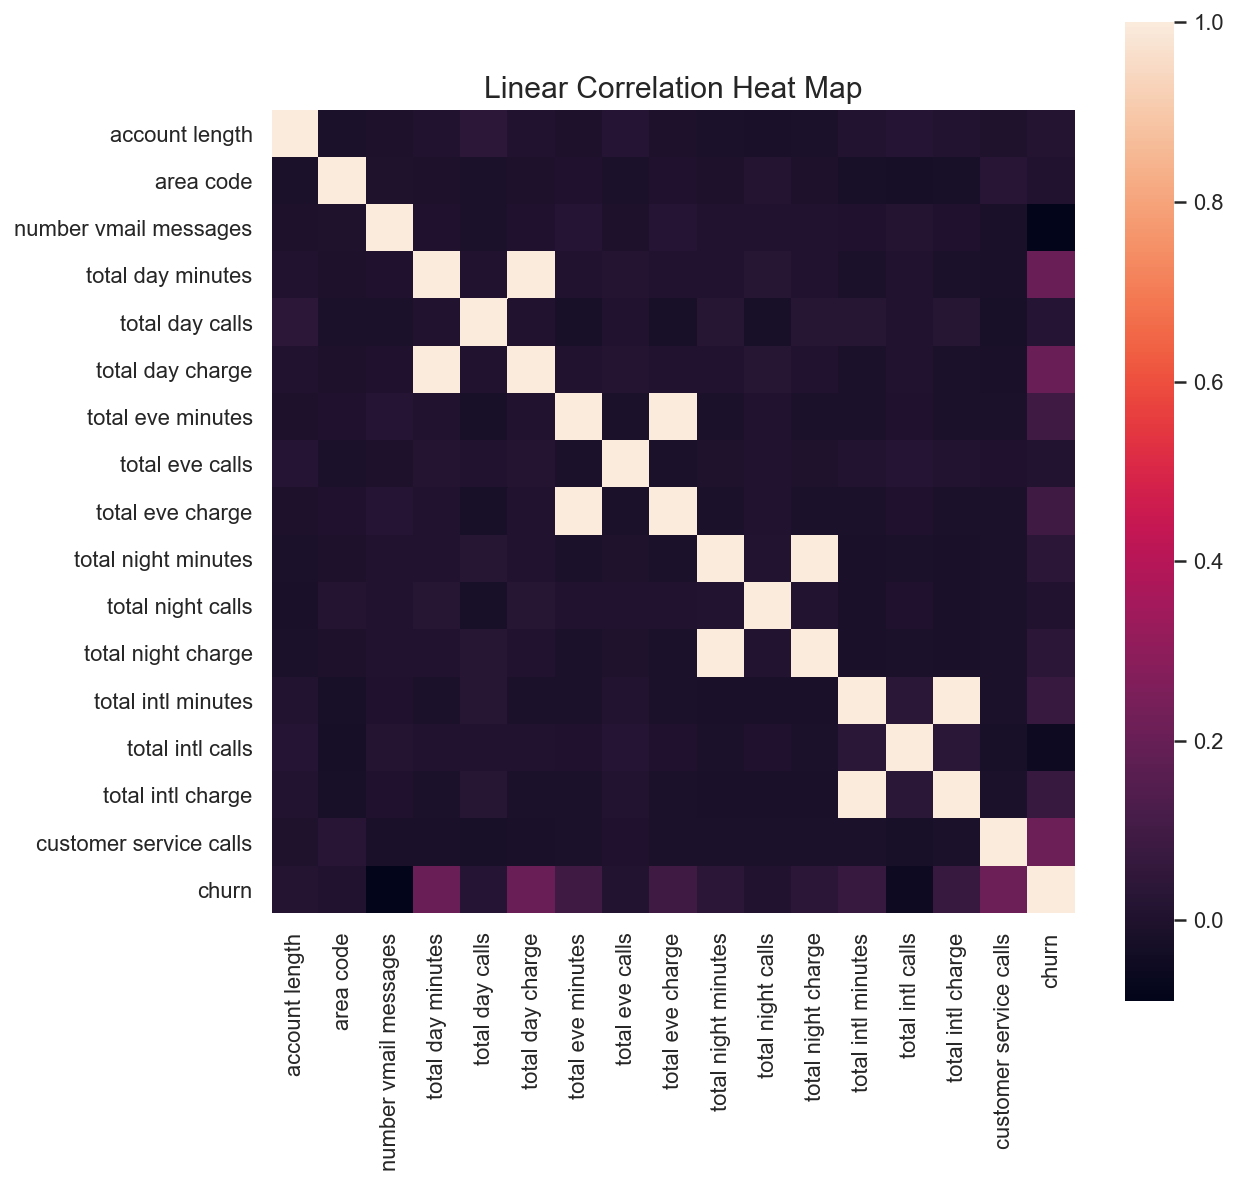

In [342]:
fig, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(churn_2.corr(), square = True)
plt.title("Linear Correlation Heat Map", fontsize = 15)
plt.show()

if print_image:
    fig.savefig("'9Heat_Map_individaul'.png");

**Feature Selection** 

We can see that we have slight linear correlations between churn and 
1. Total day minutes
2. Total day charge 
3. Customer Service calls 

**Confounding Variables**

We also have some highly correlated variables within the dataset. These may be confounding variables and may need to be removed.
1. total day charge vs total day minutes
2. total eve charge vs total eve minutes
3. total night charge vs total night minutes
4. total intl charge vs total intl minutes


## 10) Modelling

**Assumptions** <br>
1. Phone number is an irrelevant feature
2. Assuming that Charge and Minutes variables are interchangable, thus, can drop one of them.


### 10.1) Clean Data For Modeling

#### 10.1.1) Replace "Yes" and "No" with Binary variables 
1. international plan
2. voice mail plan

<font color='red'> --SAVED-- ==> churn_ml <br>
- Fourth churn data frame version </font>

In [557]:
churn_ml = churn_2.copy()

In [558]:
# remove yes and no in international plan
churn_ml['international plan'] = churn_ml['international plan'].apply(lambda x: 0 if x == 'no' else 1)
churn_ml['international plan'].head()


0    0
1    0
2    0
3    1
4    1
Name: international plan, dtype: int64

In [559]:
# remove yes and no in voice mail plan
churn_ml['voice mail plan'] = churn_ml['voice mail plan'].apply(lambda x: 0 if x == 'no' else 1)
churn_ml['voice mail plan'].head()


0    1
1    1
2    0
3    0
4    0
Name: voice mail plan, dtype: int64

#### 10.1.2) Make Dummy Variables For Non-Ordinal Categorical Variables
3. state
4. area code

In [560]:
churn_ml.dtypes

state                      object
account length              int64
area code                   int64
international plan          int64
voice mail plan             int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int64
dtype: object

In [561]:
# Get Dummy variables for state and area code
churn_ml = pd.get_dummies(churn_ml, columns=['state', 'area code'])


In [562]:
churn_ml.head()


,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,1,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,1,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,1,0


### 10.2) Remove Highly Correlated Features
- From the Heatmap we know that the Charge and Minutes features are highly correlated. Most machine learning algorithms require independence between the features to be effective (and not over fit) thus, I am making a judgement call and keeping charge whilst removing minutes.
- This stops the possiblity of Confounding variables in the data set.

In [563]:
# remove 
# 1) total day minutes
# 2) total eve minutes
# 3) total night minutes
# 4) total intl minutes

churn_ml.drop(["total day minutes", "total eve minutes", "total night minutes", "total intl minutes"], axis=1, inplace=True)


In [564]:
churn_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 68 columns):
account length            3333 non-null int64
international plan        3333 non-null int64
voice mail plan           3333 non-null int64
number vmail messages     3333 non-null int64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64
customer service calls    3333 non-null int64
churn                     3333 non-null int64
state_AK                  3333 non-null uint8
state_AL                  3333 non-null uint8
state_AR                  3333 non-null uint8
state_AZ                  3333 non-null uint8
state_CA                  3333 non-null uint8
state_CO   

### 10.3) Baseline Model Accuracy

<font color='red'> change Baseline_flag variable to True (from False) in order to see Baseline calculations </font> <br>
Required to make the Baseline Accurcay calculations work

In [513]:
# Flag for calculations
Baseline_flag = False


In [514]:
# make states mapping
if Baseline_flag:
    unique_states = list(churn_ml.state.unique())

    states_mapping = dict()
    for i, x in enumerate(unique_states):
        states_mapping[x] = i

    states_mapping
    

In [515]:
# turn states into ints in states
if Baseline_flag:
    churn_ml['state'] = churn_ml['state'].map(states_mapping)
    churn_ml['state'].head()


In [516]:
# make area code mapping
if Baseline_flag:
    unique_area_code = list(churn_ml['area code'].unique())

    unique_area_code_mapping = dict()
    for i, x in enumerate(unique_area_code):
        unique_area_code_mapping[x] = i

    unique_area_code_mapping
    

In [517]:
# turn area codes into 1, 2, 3
if Baseline_flag:
    churn_ml['area code'] = churn_ml['area code'].map(unique_area_code_mapping)
    churn_ml['area code'].head()
    

#### 10.3.1) Baseline accuracy #1: 85.51%
Baseline Accuracy #1: 85.51% 
- Rule = Choose majority class

In [518]:
# Find the percentage of examples that occur in the majority class
churn_2.churn.value_counts(normalize=True).apply(lambda x: round(x*100, 2))

0    85.51
1    14.49
Name: churn, dtype: float64

#### 10.3.2) Baseline Accuracy #2: 85.81%
- Rule = (Customer Service Calls > 3) & (International Plan == True)

<font color='red'> --SAVED-- ==> churn_5 <br>
- Fifth churn data frame version </font>

In [519]:
# make new copy of churn data set for this analysis
churn_5 = churn_ml.copy()


In [520]:
# greater than 3 service calls
if Baseline_flag:
    churn_5['Greater_Than_3_CSC'] = (churn_5['customer service calls'] > 3).astype('int')
    churn_5['Greater_Than_3_CSC'].head()


In [521]:
# in top 15 states or out of top 15 states
if Baseline_flag:
    top_15_states = set([states_mapping[x] for x in ['NJ', 'TX', 'MD', 'MI', 'MN', 'NY', 'MT', 'NV', 'MS', 'SC','WA', 'KS', 'ME', 'CT', 'OR']])
    churn_5['in_top_15_states'] = churn_5['state'].apply(lambda x: 1 if x in top_15_states else 0)
    churn_5['in_top_15_states'].head()
    

In [556]:
# Create Normalized Baseline_2 table
if Baseline_flag:
    Baseline_2 = pd.crosstab(churn_5['international plan'] & churn_5['Greater_Than_3_CSC'], churn_5['churn'], normalize=True)
    Baseline_2.apply(lambda x: round(x*100, 2))
Baseline_2

churn,0,1
row_0,,
0,0.852385,0.139214
1,0.002700,0.005701


So using the rule: <br>
if (Customer Service Calls > 3) & (International Plan == True) ==> churn=1 <br>
else ==> churn=0: <br>
<br>
We get a Basline accuracy of <br>
Baseline accuracy #2 = 85.24 + 0.57 = 85.81%




#### 10.3.3) Baseline Accuracy #3: 86.32%
- Issue Could be data set specific
- Rule = (Customer Service Calls > 3) & (in_top_15_states == True)

In [525]:
# Create Normalized Baseline_3 table
if Baseline_flag:
    Baseline_3 = pd.crosstab(churn_5['Greater_Than_3_CSC'] & churn_5['in_top_15_states'], churn_5['churn'], normalize=True)
    Baseline_3.apply(lambda x: round(x*100, 2))

Baseline_3

churn,0,1
row_0,,
0,0.845485,0.127213
1,0.009601,0.017702


So using the rule: <br>
if (Customer Service Calls > 3) & (in_top_15_states == True) ==> churn=1 <br>
else ==> churn=0: <br>
<br>
We get a Basline accuracy of <br>
Baseline accuracy #3 = 84.55 + 1.77 = 86.32%



### 10.4) Select Model Features

#### 10.4.1) Univariate Selection
- sklearn SelectKBest: uses chi-squared statistical test
  - **Select features that have the strongest relationship with the output variables**

In [565]:
independent_variables = churn_ml.drop(['churn'], axis=1)
dependent_variable = churn_ml['churn']


In [566]:
# chi-squared statistical test for feature selection
# select 20 best features

pd.set_option('display.max_rows', 70) # display all dataframe

k = len(churn_ml.columns) - 1

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = independent_variables  #independent columns
y = dependent_variable    #target column i.e price range
# apply SelectKBest class to extract top 20 best features
bestfeatures = SelectKBest(score_func=chi2, k=k)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  # naming the DataFrame columns

indicies = [x for x in range(1, k+1)] # reindex the dataframe

print('-------- Top {} Best Features --------'.format(k))
print(featureScores.nlargest(k,'Score').set_index(pd.Index(indicies)))  # print 20 best features

# write to an excel file
if False:
    featureScores.nlargest(k,'Score').set_index(pd.Index(indicies)).to_excel('./SelectKBest.xlsx');


-------- Top 67 Best Features --------
                     Specs       Score
1    number vmail messages  620.628799
2         total day charge  393.399658
3       international plan  203.244178
4   customer service calls  160.773588
5         total eve charge   31.201931
6          voice mail plan   25.156959
7           account length   14.304197
8         total intl calls   12.582769
9                 state_NJ    7.874786
10                state_TX    6.416479
11                state_MD    5.419015
12         total day calls    4.553059
13                state_VA    3.974897
14                state_CA    3.937393
15                state_SC    3.785468
16                state_AZ    3.508050
17                state_HI    3.335657
18                state_MI    3.249027
19                state_AK    3.192537
20       total intl charge    3.190593
21                state_MS    2.604966
22                state_WA    2.405736
23                state_NV    2.405736
24      total night charg

### 10.5) Normalise and Scale

In [567]:
churn_ml_columns = churn_ml.columns.tolist()
churn_ml_columns.remove('churn')


In [568]:
# scale and normalize everything except for churn
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

churn_ml[churn_ml_columns] = scale.fit_transform(churn_ml[churn_ml_columns].as_matrix())


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [569]:
churn_ml.head()

,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510
0,0.676489,-0.327580,1.617086,1.234883,0.476643,1.567036,-0.055940,-0.070427,-0.465494,0.866029,...,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,-0.579544,1.006925,-0.580468
1,0.149065,-0.327580,1.617086,1.307948,1.124503,-0.334013,0.144867,-0.107549,0.147825,1.059390,...,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,-0.579544,1.006925,-0.580468
2,0.902529,-0.327580,-0.618396,-0.591760,0.675985,1.168464,0.496279,-1.573900,0.198935,-0.755571,...,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,-0.579544,1.006925,-0.580468
3,-0.428590,3.052685,-0.618396,-0.591760,-1.466936,2.196759,-0.608159,-2.743268,-0.567714,-0.078806,...,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,1.725493,-0.993123,-0.580468
4,-0.654629,3.052685,-0.618396,-0.591760,0.626149,-0.240041,1.098699,-1.037939,1.067803,-0.276562,...,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,-0.579544,1.006925,-0.580468


### 10.6) Balance Positive and Negative Class Distributions

### 10.7) Test, Train, Split

In [570]:
from sklearn.model_selection import train_test_split

# all columns without loan_status_num and loan_status
X = churn_ml.drop(['churn'], axis=1)
# loan_status_num column
y = churn_ml.churn

X_train, X_test, y_train, y_test = train_test_split(X,y)

### 10.8) Kfolds Cross Validation

### 10.9) Model Selection

### 10.10) Build Models and Evaluate Them

#### 10.10.1) Logistic Regression

In [571]:
# Fit a logistic regression model and store the class predictions.
from sklearn.linear_model import LogisticRegression
rand_state = 8

LR = LogisticRegression(random_state=rand_state, C=100, )

LR.fit(X_train,y_train)

y_pred = LR.predict(X_test)

model_score = LR.score(X_test, y_test)
model_score= round(model_score*100,2)
model_score

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


86.57

In [572]:
d_nd = churn_ml.churn.value_counts().tolist()
defaults = d_nd[1]
non_default = d_nd[0]

base_line = 0.8632
base_line = round(base_line*100, 2)
print('The baseline for the model is %.4f and the model scored %.4f' % (base_line, model_score))
print('So the model exceeded the baseline by %.4f' % (model_score - base_line))

The baseline for the model is 86.3200 and the model scored 86.5700
So the model exceeded the baseline by 0.2500


In [573]:
import math
# Examine the coefficient 
feature_cols = X.columns.tolist()
coefficients = LR.coef_.tolist()[0]

features = list(zip(feature_cols, coefficients))

sorted_features = sorted(features, key=lambda x: x[1]) 


new = []
for i in sorted_features:
    if i[1] < 0:
        new.append((i[0], math.fabs(i[1])))
    else:
        new.append(i)
    
new = sorted(new, key=lambda x: x[1], reverse=True)
  
print("ABSOLUTE VALUES")
c = 0
dummy = []
for i in new:
    print(i)
    dummy.append(i[0])
    c += 1
    if c >= 5:
        break
        
print()

print("NEGATIVES INCLUDED")
c = 0
for i in sorted_features:
    if i[0] in dummy:
        print(i)

ABSOLUTE VALUES
('voice mail plan', 0.9055500296601621)
('customer service calls', 0.7761339052773686)
('total day charge', 0.6799152964776505)
('international plan', 0.6404428568091199)
('number vmail messages', 0.5485725143162605)

NEGATIVES INCLUDED
('voice mail plan', -0.9055500296601621)
('number vmail messages', 0.5485725143162605)
('international plan', 0.6404428568091199)
('total day charge', 0.6799152964776505)
('customer service calls', 0.7761339052773686)


**- Confusion Matrix**

In [574]:
from sklearn import metrics

In [575]:
# Get probability predictions.
logit_pred_proba_LR = LR.predict_proba(X_test)[:,1]

In [576]:
confusion_matrix_LR = metrics.confusion_matrix(y_true=y_test, y_pred=logit_pred_proba_LR > .5)

In [577]:
print('TN =', confusion_matrix_LR[0][0], 'FP =', confusion_matrix_LR[0][1])
print('FN =', confusion_matrix_LR[1][0], 'TP =', confusion_matrix_LR[1][1])

TN = 687 FP = 32
FN = 80 TP = 35


**- f1 Score**

In [578]:
from sklearn.metrics import classification_report

predictions = LR.predict(X_test)

print(classification_report(y_test, predictions, target_names=['loyal', 'churned']))



              precision    recall  f1-score   support

       loyal       0.90      0.96      0.92       719
     churned       0.52      0.30      0.38       115

   micro avg       0.87      0.87      0.87       834
   macro avg       0.71      0.63      0.65       834
weighted avg       0.84      0.87      0.85       834



#### 10.10.2) Random Forest

In [579]:
from sklearn.ensemble import RandomForestClassifier
rand_state = 8

rf = RandomForestClassifier(random_state=rand_state, n_estimators=30, max_depth=5, class_weight='balanced')

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

model_score = rf.score(X_test, y_test)
model_score= round(model_score*100,2)
model_score

88.97

In [580]:
d_nd = churn_ml.churn.value_counts().tolist()
defaults = d_nd[1]
non_default = d_nd[0]

base_line = 0.8632
base_line = round(base_line*100, 2)
print('The baseline for the model is %.4f and the model scored %.4f' % (base_line, model_score))
print('So the model exceeded the baseline by %.4f' % (model_score - base_line))


The baseline for the model is 86.3200 and the model scored 88.9700
So the model exceeded the baseline by 2.6500


**- Confusion Matrix**

In [581]:
# Get probability predictions.
logit_pred_proba_rf = rf.predict_proba(X_test)[:,1]

In [582]:
confusion_matrix_rf = metrics.confusion_matrix(y_true=y_test, y_pred=logit_pred_proba_rf > .5)

In [583]:
print('TN =', confusion_matrix_rf[0][0], 'FP =', confusion_matrix_rf[0][1])
print('FN =', confusion_matrix_rf[1][0], 'TP =', confusion_matrix_rf[1][1])

TN = 649 FP = 70
FN = 22 TP = 93


**- f1 Score**

In [584]:
from sklearn.metrics import classification_report

predictions = rf.predict(X_test)

print(classification_report(y_test, predictions, target_names=['loyal', 'churned']))

              precision    recall  f1-score   support

       loyal       0.97      0.90      0.93       719
     churned       0.57      0.81      0.67       115

   micro avg       0.89      0.89      0.89       834
   macro avg       0.77      0.86      0.80       834
weighted avg       0.91      0.89      0.90       834



#### 10.10.3) GradientBoostingClassifier

In [585]:
from sklearn.ensemble import GradientBoostingClassifier
rand_state = 8

GBC = GradientBoostingClassifier(random_state=rand_state, n_estimators=30, max_depth=5)

GBC.fit(X_train,y_train)

y_pred = GBC.predict(X_test)

model_score = GBC.score(X_test, y_test)
model_score = round(model_score*100,2)
model_score

95.56

In [586]:
d_nd = churn_ml.churn.value_counts().tolist()
defaults = d_nd[1]
non_default = d_nd[0]

base_line = 0.8632
base_line = round(base_line*100, 2)
print('The baseline for the model is %.4f and the model scored %.4f' % (base_line, model_score))
print('So the model exceeded the baseline by %.4f' % (model_score - base_line))



The baseline for the model is 86.3200 and the model scored 95.5600
So the model exceeded the baseline by 9.2400


**- Confusion Matrix**

In [587]:
# Get probability predictions.
logit_pred_proba_GBC = GBC.predict_proba(X_test)[:,1]

In [588]:
confusion_matrix_GBC = metrics.confusion_matrix(y_true=y_test, y_pred=logit_pred_proba_GBC > .5)

In [589]:
print('TN =', confusion_matrix_GBC[0][0], 'FP =', confusion_matrix_GBC[0][1])
print('FN =', confusion_matrix_GBC[1][0], 'TP =', confusion_matrix_GBC[1][1])

TN = 711 FP = 8
FN = 29 TP = 86


**- f1 Score**

In [590]:
from sklearn.metrics import classification_report

predictions = GBC.predict(X_test)

print(classification_report(y_test, predictions, target_names=['loyal', 'churned']))

              precision    recall  f1-score   support

       loyal       0.96      0.99      0.97       719
     churned       0.91      0.75      0.82       115

   micro avg       0.96      0.96      0.96       834
   macro avg       0.94      0.87      0.90       834
weighted avg       0.95      0.96      0.95       834



## 11) Model Accuracy with Feature Selection

### 11.1) Model Feature Selection

In [500]:
churn_ml_FS = churn_ml.copy()


In [527]:
feature_selection = ['customer service calls', 'total charge', 'international plan', 'total minutes', 'churn']

churn_ml_FS = churn_3[feature_selection]

### 11.2) Clean Data For Modeling

#### 11.2.1) Replace "Yes" and "No" with Binary variables 
1. international plan
2. voice mail plan

In [530]:
# remove yes and no in international plan
churn_ml_FS['international plan'] = churn_ml_FS['international plan'].apply(lambda x: 0 if x == 'no' else 1)
churn_ml_FS['international plan'].head()


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    1
1    1
2    1
3    1
4    1
Name: international plan, dtype: int64

#### 11.2.2) Make Dummy Variables For Non-Ordinal Categorical Variables
3. state
4. area code

In [471]:
churn_ml_FS.dtypes

state                      object
account length              int64
area code                   int64
international plan          int64
voice mail plan             int64
number vmail messages       int64
customer service calls      int64
total calls                 int64
total charge              float64
churn                       int64
dtype: object

In [472]:
# Get Dummy variables for state and area code
churn_ml_FS = pd.get_dummies(churn_ml_FS, columns=['state', 'area code'])


In [473]:
churn_ml_FS.head()


,account length,international plan,voice mail plan,number vmail messages,customer service calls,total calls,total charge,churn,state_AK,state_AL,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510
0,128,1,1,25,1,303,75.56,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,107,1,1,26,1,332,59.24,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,137,1,1,0,0,333,62.29,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,84,1,1,0,2,255,66.80,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,75,1,1,0,3,359,52.09,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### 11.3) Normalise and Scale

In [532]:
churn_ml_FS_columns = churn_ml_FS.columns.tolist()
churn_ml_FS_columns.remove('churn')


In [533]:
# scale and normalize everything except for churn
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

churn_ml_FS[churn_ml_FS_columns] = scale.fit_transform(churn_ml_FS[churn_ml_FS_columns].as_matrix())


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [534]:
churn_ml_FS.head()

,customer service calls,total charge,international plan,total minutes,churn,in_top_15_states
0,-0.427932,1.534209,0.0,1.393531,0,1.465370
1,-0.427932,-0.019975,0.0,0.370635,0,-0.682422
2,-1.188218,0.270482,0.0,-0.583326,0,1.465370
3,0.332354,0.699978,0.0,-0.300918,0,-0.682422
4,1.092641,-0.700883,0.0,-0.887971,0,-0.682422


### 11.3) Test, Train, Split

In [535]:
from sklearn.model_selection import train_test_split

# all columns without loan_status_num and loan_status
X = churn_ml_FS.drop(['churn'], axis=1)
# loan_status_num column
y = churn_ml_FS.churn

X_train, X_test, y_train, y_test = train_test_split(X,y)

### 11.4) Build Models and Evaluate Them

#### 11.4.1) Logistic Regression

In [536]:
# Fit a logistic regression model and store the class predictions.
from sklearn.linear_model import LogisticRegression
rand_state = 8

LR = LogisticRegression(random_state=rand_state, C=100, )

LR.fit(X_train,y_train)

y_pred = LR.predict(X_test)

model_score = LR.score(X_test, y_test)
model_score= round(model_score*100,2)
model_score

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


84.05

In [537]:
d_nd = churn_ml_FS.churn.value_counts().tolist()
defaults = d_nd[1]
non_default = d_nd[0]

base_line = 0.8632
base_line = round(base_line*100, 2)
print('The baseline for the model is %.4f and the model scored %.4f' % (base_line, model_score))
print('So the model exceeded the baseline by %.4f' % (model_score - base_line))

The baseline for the model is 86.3200 and the model scored 84.0500
So the model exceeded the baseline by -2.2700


In [538]:
import math
# Examine the coefficient 
feature_cols = X.columns.tolist()
coefficients = LR.coef_.tolist()[0]

features = list(zip(feature_cols, coefficients))

sorted_features = sorted(features, key=lambda x: x[1]) 


new = []
for i in sorted_features:
    if i[1] < 0:
        new.append((i[0], math.fabs(i[1])))
    else:
        new.append(i)
    
new = sorted(new, key=lambda x: x[1], reverse=True)
  
print("ABSOLUTE VALUES")
c = 0
dummy = []
for i in new:
    print(i)
    dummy.append(i[0])
    c += 1
    if c >= 5:
        break
        
print()

print("NEGATIVES INCLUDED")
c = 0
for i in sorted_features:
    if i[0] in dummy:
        print(i)

ABSOLUTE VALUES
('total charge', 0.9605838136937863)
('customer service calls', 0.5846629837108396)
('in_top_15_states', 0.3089900992572712)
('total minutes', 0.20715296436917696)
('international plan', 0.0)

NEGATIVES INCLUDED
('total minutes', -0.20715296436917696)
('international plan', 0.0)
('in_top_15_states', 0.3089900992572712)
('customer service calls', 0.5846629837108396)
('total charge', 0.9605838136937863)


**- Confusion Matrix**

In [539]:
from sklearn import metrics

In [540]:
# Get probability predictions.
logit_pred_proba_LR = LR.predict_proba(X_test)[:,1]

In [541]:
confusion_matrix_LR = metrics.confusion_matrix(y_true=y_test, y_pred=logit_pred_proba_LR > .5)

In [542]:
print('TN =', confusion_matrix_LR[0][0], 'FP =', confusion_matrix_LR[0][1])
print('FN =', confusion_matrix_LR[1][0], 'TP =', confusion_matrix_LR[1][1])

TN = 687 FP = 14
FN = 119 TP = 14


**- f1 Score**

In [543]:
from sklearn.metrics import classification_report

predictions = LR.predict(X_test)

print(classification_report(y_test, predictions, target_names=['loyal', 'churned']))



              precision    recall  f1-score   support

       loyal       0.85      0.98      0.91       701
     churned       0.50      0.11      0.17       133

   micro avg       0.84      0.84      0.84       834
   macro avg       0.68      0.54      0.54       834
weighted avg       0.80      0.84      0.79       834



#### 11.4.2) Random Forest

In [544]:
from sklearn.ensemble import RandomForestClassifier
rand_state = 8

rf = RandomForestClassifier(random_state=rand_state, n_estimators=30, max_depth=5, class_weight='balanced')

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

model_score = rf.score(X_test, y_test)
model_score= round(model_score*100,2)
model_score

92.45

In [545]:
d_nd = churn_ml_FS.churn.value_counts().tolist()
defaults = d_nd[1]
non_default = d_nd[0]

base_line = 0.8632
base_line = round(base_line*100, 2)
print('The baseline for the model is %.4f and the model scored %.4f' % (base_line, model_score))
print('So the model exceeded the baseline by %.4f' % (model_score - base_line))


The baseline for the model is 86.3200 and the model scored 92.4500
So the model exceeded the baseline by 6.1300


**- Confusion Matrix**

In [546]:
# Get probability predictions.
logit_pred_proba_rf = rf.predict_proba(X_test)[:,1]

In [547]:
confusion_matrix_rf = metrics.confusion_matrix(y_true=y_test, y_pred=logit_pred_proba_rf > .5)

In [548]:
print('TN =', confusion_matrix_rf[0][0], 'FP =', confusion_matrix_rf[0][1])
print('FN =', confusion_matrix_rf[1][0], 'TP =', confusion_matrix_rf[1][1])

TN = 680 FP = 21
FN = 42 TP = 91


**- f1 Score**

In [549]:
from sklearn.metrics import classification_report

predictions = rf.predict(X_test)

print(classification_report(y_test, predictions, target_names=['loyal', 'churned']))

              precision    recall  f1-score   support

       loyal       0.94      0.97      0.96       701
     churned       0.81      0.68      0.74       133

   micro avg       0.92      0.92      0.92       834
   macro avg       0.88      0.83      0.85       834
weighted avg       0.92      0.92      0.92       834



#### 11.4.3) GradientBoostingClassifier

In [550]:
from sklearn.ensemble import GradientBoostingClassifier
rand_state = 8

GBC = GradientBoostingClassifier(random_state=rand_state, n_estimators=30, max_depth=5)

GBC.fit(X_train,y_train)

y_pred = GBC.predict(X_test)

model_score = GBC.score(X_test, y_test)
model_score = round(model_score*100,2)
model_score

92.57

In [551]:
d_nd = churn_ml_FS.churn.value_counts().tolist()
defaults = d_nd[1]
non_default = d_nd[0]

base_line = 0.8632
base_line = round(base_line*100, 2)
print('The baseline for the model is %.4f and the model scored %.4f' % (base_line, model_score))
print('So the model exceeded the baseline by %.4f' % (model_score - base_line))



The baseline for the model is 86.3200 and the model scored 92.5700
So the model exceeded the baseline by 6.2500


**- Confusion Matrix**

In [552]:
# Get probability predictions.
logit_pred_proba_GBC = GBC.predict_proba(X_test)[:,1]

In [553]:
confusion_matrix_GBC = metrics.confusion_matrix(y_true=y_test, y_pred=logit_pred_proba_GBC > .5)

In [554]:
print('TN =', confusion_matrix_GBC[0][0], 'FP =', confusion_matrix_GBC[0][1])
print('FN =', confusion_matrix_GBC[1][0], 'TP =', confusion_matrix_GBC[1][1])

TN = 684 FP = 17
FN = 45 TP = 88


**- f1 Score**

In [555]:
from sklearn.metrics import classification_report

predictions = GBC.predict(X_test)

print(classification_report(y_test, predictions, target_names=['loyal', 'churned']))

              precision    recall  f1-score   support

       loyal       0.94      0.98      0.96       701
     churned       0.84      0.66      0.74       133

   micro avg       0.93      0.93      0.93       834
   macro avg       0.89      0.82      0.85       834
weighted avg       0.92      0.93      0.92       834



# APPENDIX

**Investigate Numeric Columns Individaully**

Numeric Features <br>
1. Account length
2. Number vmail messages
3. Day
 - total day minutes
 - total day calls
 - total day charge
4. Eve
 - total eve minutes
 - total eve calls
 - total eve charge
5. Night
 - total night minutes
 - total night calls
 - total night charge
6. Intl
 - total intl minutes
 - total intl calls
 - total intl charge
7. Customer service calls


In [314]:
numeric_features = churn_2.select_dtypes(np.number)
numeric_features.drop('area code', axis = 1, inplace = True)

/Users/poorgrahamsalmanack/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [315]:
numeric_features.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [316]:
numeric_columns = numeric_features.columns.tolist()
print(numeric_columns)

['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']


1. account length

In [317]:
numeric_features['account length'].describe().apply(lambda x: round(x))

count    3333
mean      101
std        40
min         1
25%        74
50%       101
75%       127
max       243
Name: account length, dtype: int64

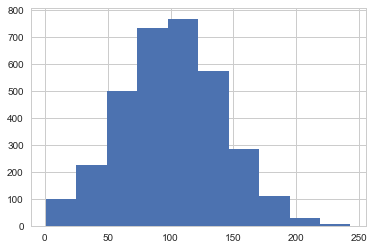

In [318]:
numeric_features['account length'].hist();

2. number vmail messages

In [319]:
numeric_features['number vmail messages'].describe().apply(lambda x: round(x))

count    3333
mean        8
std        14
min         0
25%         0
50%         0
75%        20
max        51
Name: number vmail messages, dtype: int64

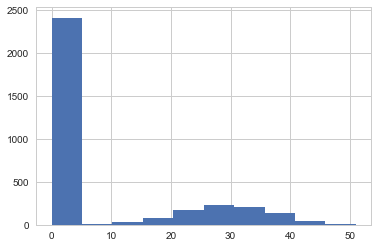

In [320]:
numeric_features['number vmail messages'].hist();

3. Day

 - total day minutes

In [321]:
numeric_features['total day minutes'].describe().apply(lambda x: round(x))

count    3333
mean      180
std        54
min         0
25%       144
50%       179
75%       216
max       351
Name: total day minutes, dtype: int64

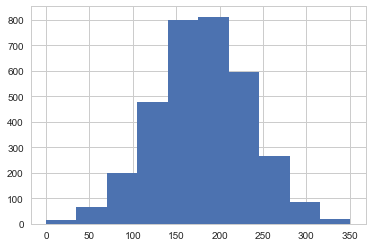

In [322]:
numeric_features['total day minutes'].hist();

- total day calls <br>
 - Obviously depends on how long the person has been with the carrier

In [323]:
numeric_features['total day calls'].describe().apply(lambda x: round(x))

count    3333
mean      100
std        20
min         0
25%        87
50%       101
75%       114
max       165
Name: total day calls, dtype: int64

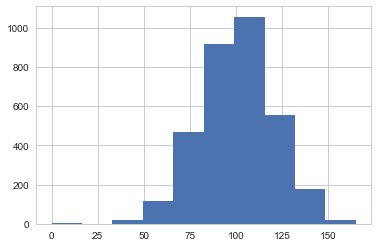

In [324]:
numeric_features['total day calls'].hist();

- total day charge <br>

In [325]:
numeric_features['total day charge'].describe().apply(lambda x: round(x))

count    3333
mean       31
std         9
min         0
25%        24
50%        30
75%        37
max        60
Name: total day charge, dtype: int64

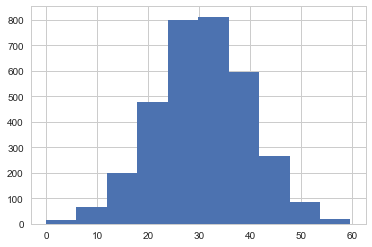

In [326]:
numeric_features['total day charge'].hist();

4. Evening

- total eve minutes

In [327]:
numeric_features['total eve minutes'].describe().apply(lambda x: round(x))

count    3333
mean      201
std        51
min         0
25%       167
50%       201
75%       235
max       364
Name: total eve minutes, dtype: int64

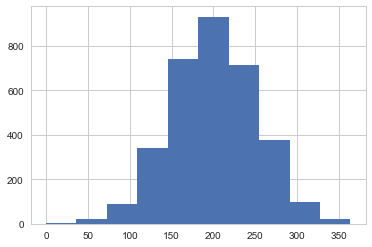

In [328]:
numeric_features['total eve minutes'].hist();

- total eve calls <br>

In [329]:
numeric_features['total eve calls'].describe().apply(lambda x: round(x))

count    3333
mean      100
std        20
min         0
25%        87
50%       100
75%       114
max       170
Name: total eve calls, dtype: int64

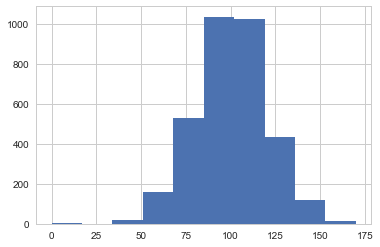

In [330]:
numeric_features['total eve calls'].hist();

- total eve charge <br>

In [331]:
numeric_features['total eve charge'].describe().apply(lambda x: round(x))

count    3333
mean       17
std         4
min         0
25%        14
50%        17
75%        20
max        31
Name: total eve charge, dtype: int64

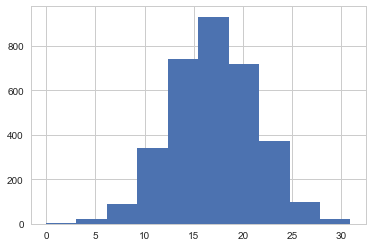

In [332]:
numeric_features['total eve charge'].hist();

5. Night

- total night minutes

In [333]:
numeric_features['total night minutes'].describe().apply(lambda x: round(x))

count    3333
mean      201
std        51
min        23
25%       167
50%       201
75%       235
max       395
Name: total night minutes, dtype: int64

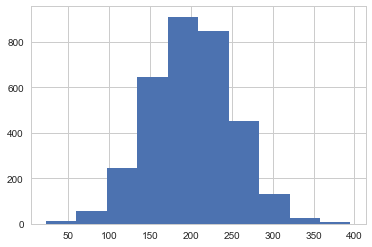

In [334]:
numeric_features['total night minutes'].hist();

- total night calls <br>

In [335]:
numeric_features['total night calls'].describe().apply(lambda x: round(x))

count    3333
mean      100
std        20
min        33
25%        87
50%       100
75%       113
max       175
Name: total night calls, dtype: int64

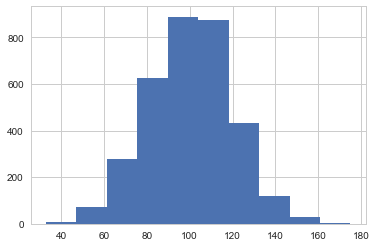

In [336]:
numeric_features['total night calls'].hist();

- total night charge <br>

In [337]:
numeric_features['total night charge'].describe().apply(lambda x: round(x))

count    3333
mean        9
std         2
min         1
25%         8
50%         9
75%        11
max        18
Name: total night charge, dtype: int64

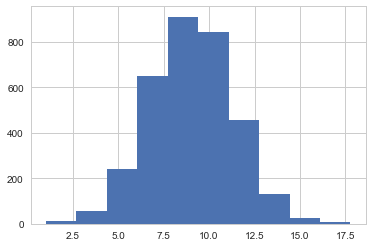

In [338]:
numeric_features['total night charge'].hist();

6. International

- total intl minutes

In [339]:
numeric_features['total intl minutes'].describe().apply(lambda x: round(x))

count    3333
mean       10
std         3
min         0
25%         8
50%        10
75%        12
max        20
Name: total intl minutes, dtype: int64

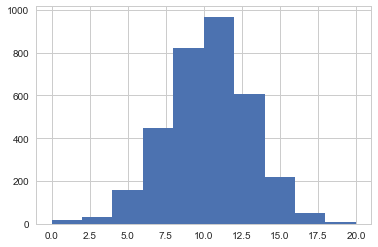

In [340]:
numeric_features['total intl minutes'].hist();

- total intl calls <br>

In [341]:
numeric_features['total intl calls'].describe().apply(lambda x: round(x))

count    3333
mean        4
std         2
min         0
25%         3
50%         4
75%         6
max        20
Name: total intl calls, dtype: int64

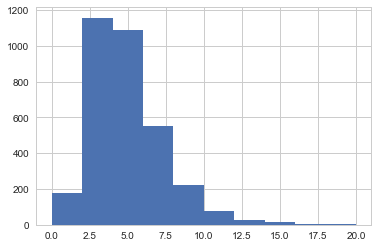

In [342]:
numeric_features['total intl calls'].hist();

- total intl charge <br>

In [343]:
numeric_features['total night charge'].describe().apply(lambda x: round(x))

count    3333
mean        9
std         2
min         1
25%         8
50%         9
75%        11
max        18
Name: total night charge, dtype: int64

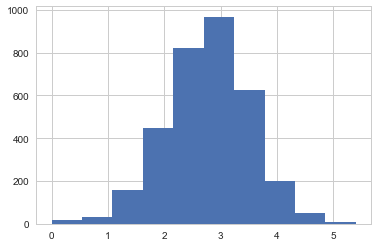

In [344]:
numeric_features['total intl charge'].hist();

7. Customer service calls

In [345]:
numeric_features['customer service calls'].describe().apply(lambda x: round(x))

count    3333
mean        2
std         1
min         0
25%         1
50%         1
75%         2
max         9
Name: customer service calls, dtype: int64

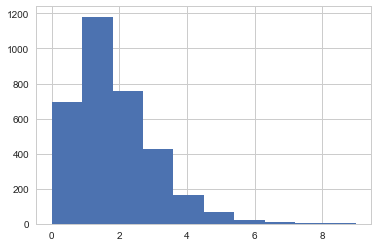

In [346]:
numeric_features['customer service calls'].hist();

#### 1) CATEGORICAL VARIABLES
1. State
2. International Plan
3. Voice mail plan
4. Area code

**1) state vs churn**

**bar plot** <br> 
<font color='red> Try to 

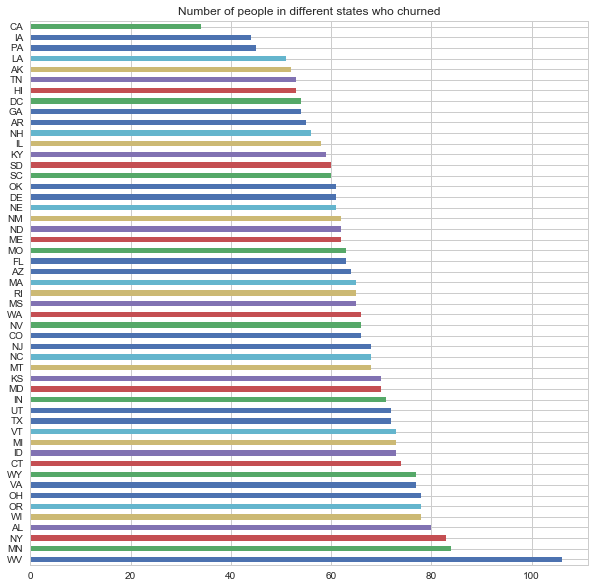

In [182]:
# overlay of both churn and didn't churn distributions
fig, ax = plt.subplots(figsize=(10,10))
churn_2[(churn_2["churn"]==True) | (churn_2["churn"]==False)]["state"].value_counts().plot(kind='barh')
plt.title("Number of people in different states who churned")
plt.show()

**2) International plan vs churn** <font color="red"> need t

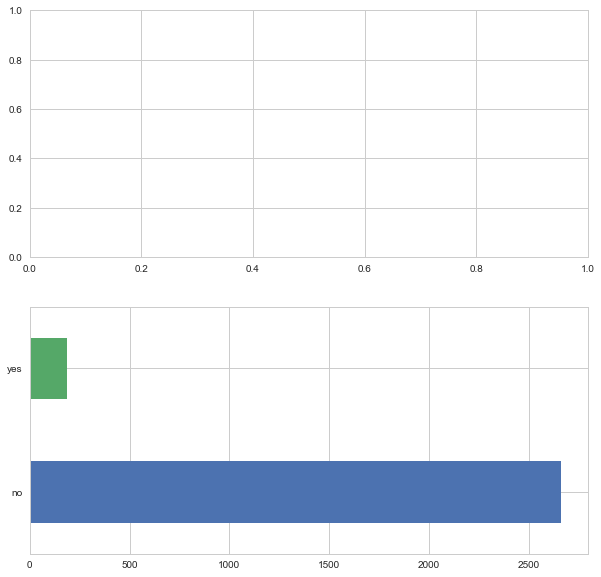

In [213]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
churn_2[(churn_2["churn"]==True)]["international plan"].value_counts().plot(kind='barh')
churn_2[(churn_2["churn"]==False)]["international plan"].value_counts().plot(kind='barh')
plt.title("")
plt.show()
plt.show()

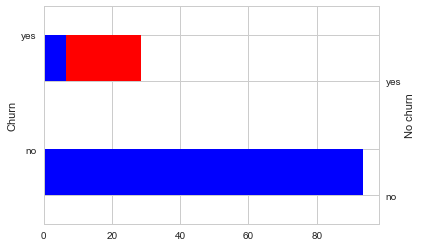

In [227]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

churn_2[(churn_2["churn"]==True)]["international plan"].value_counts().apply(lambda x: x/len(churn_2[(churn_2["churn"]==True)])*100).plot(kind='barh', color='red', ax=ax, width=width, position=1)
churn_2[(churn_2["churn"]==False)]["international plan"].value_counts().apply(lambda x: x/len(churn_2[(churn_2["churn"]==False)])*100).plot(kind='barh', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Churn')
ax2.set_ylabel('No churn')

#ax.set_ylim(100)
#ax2.set_ylim(100)

plt.show()

In [218]:
churn_2[(churn_2["churn"]==True)]["international plan"].value_counts().apply(lambda x: x/len(churn_2[(churn_2["churn"]==True)]))

no     0.716356
yes    0.283644
Name: international plan, dtype: float64

In [222]:
churn_2[(churn_2["churn"]==False)]["international plan"].value_counts().apply(lambda x: x/len(churn_2[(churn_2["churn"]==False)]))

no     0.934737
yes    0.065263
Name: international plan, dtype: float64